In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd

In [0]:
original=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lending Club Project_Joint/training_filled.csv')

In [0]:
back_up=original.copy()

In [85]:
original.head()

id  acc_open_past_24mths  ... num_rev_accts_all dti_all
0  1294383                   5.0  ...               2.0   20.42
1  1876502                   0.0  ...               6.0    7.97
2   954710                   0.0  ...              15.0   11.52
3   809314                   7.0  ...              19.0   23.66
4  1069627                   0.0  ...               9.0   10.22

[5 rows x 43 columns]

# 1. Feature Engineering
  - Data Type Inspection
  - Data Type Transformation
  - Rescale Numeric Values
  - Covert Categorical Values

## 1.1 Data Type Inspection

In this section, we can see the original data types are 34 float64, 6 object and 3 int64. This appears some data types are correct but some are incorrect, for example, the dummy variable are supposed to object data type, rather in the original data set, it was set as int64.

In [86]:
original.shape

(1045085, 43)

In [87]:
original.dtypes.value_counts()

float64    34
object      6
int64       3
dtype: int64

In [88]:
pd.DataFrame(original.dtypes, columns=['Data Type']).T

id acc_open_past_24mths  ... num_rev_accts_all  dti_all
Data Type  int64              float64  ...           float64  float64

[1 rows x 43 columns]

## 1.2 Data Type Transformation
Transforming data types:
Changes are made for better reflecting the data in the problem. Total 21 variables were involved in data type transformation.
- **Number of Changes in Each Data Type :**
  - float64: from 34 to 16
  - int64:   from 3 to 21
  - object: from 6 to 6 (unchanged)

- **float64 >> int64(19):** inq_last_6mths, mo_sin_rcnt_rev_tl_op, mths_since_recent_bc, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_il_tl, num_op_rev_tl, num_sats, num_tl_op_past_12m, verification_status_all, if_worse_rate_all, if_revol_delinq, if_cur_il, if_collections_12_mths, if_chargeoff_12_mths, if_delinq_2yrs, if_pub_rec, if_pub_rec_bankruptcies

- **int64 >> float64(1):** loan_amnt

In [89]:
# To int64
original.loc[:,['inq_last_6mths', 'mo_sin_rcnt_rev_tl_op','mths_since_recent_bc', 'num_actv_bc_tl',
                'num_actv_rev_tl', 'num_bc_sats', 'num_il_tl','num_op_rev_tl', 'num_sats', 
                'num_tl_op_past_12m', 'verification_status_all','if_worse_rating', 
                'if_revol_delinq', 'if_cur_il', 'if_collections_12_mths',
                'if_chargeoff_12_mths', 'if_delinq_2yrs', 'if_pub_rec', 'if_pub_rec_bankruptcies']]  = original.loc[:,['inq_last_6mths', 
                'mo_sin_rcnt_rev_tl_op','mths_since_recent_bc', 'num_actv_bc_tl','num_actv_rev_tl',
                'num_bc_sats', 'num_il_tl','num_op_rev_tl', 'num_sats', 
                'num_tl_op_past_12m', 'verification_status_all','if_worse_rating', 
                'if_revol_delinq', 'if_cur_il', 'if_collections_12_mths',
                'if_chargeoff_12_mths', 'if_delinq_2yrs', 'if_pub_rec', 'if_pub_rec_bankruptcies']].astype('int64')

print("After to int64:")
print(original.dtypes.value_counts())

After to int64:
int64      22
float64    15
object      6
dtype: int64


In [90]:
# To float64
original.loan_amnt=original.loan_amnt.astype('float64')

print("After to float64:")
print(original.dtypes.value_counts())

After to float64:
int64      21
float64    16
object      6
dtype: int64


In [91]:
pd.DataFrame(original.dtypes, columns=['Data Type']).T

id acc_open_past_24mths  ... num_rev_accts_all  dti_all
Data Type  int64              float64  ...           float64  float64

[1 rows x 43 columns]

## 1.3 Rescale Numeric Values

**Rescale Multiple Digits(devided by 10k):**

annual_inc_all, avg_cur_bal, bc_open_to_buy, loan_amnt, revol_bal_all, tot_coll_amt, tot_cur_bal, total_bal_ex_mort

**Convert to percentage(devided by 100):**

percent_bc_gt_75, pct_tl_nvr_dlq, dti_all


In [94]:
print('Before Recale:')
original.head()

Before Recale:


id  acc_open_past_24mths  ... num_rev_accts_all dti_all
0  1294383                   5.0  ...               2.0   20.42
1  1876502                   0.0  ...               6.0    7.97
2   954710                   0.0  ...              15.0   11.52
3   809314                   7.0  ...              19.0   23.66
4  1069627                   0.0  ...               9.0   10.22

[5 rows x 43 columns]

In [0]:
# Multiple Digits
original.loc[:,['annual_inc_all', 'avg_cur_bal', 'bc_open_to_buy', 'loan_amnt',
                'revol_bal_all', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_ex_mort']]=original.loc[:,['annual_inc_all', 'avg_cur_bal', 'bc_open_to_buy', 'loan_amnt',
                'revol_bal_all', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_ex_mort']]/10000
# Percentage
original.loc[:,['percent_bc_gt_75', 'pct_tl_nvr_dlq', 'dti_all']]=original.loc[:,['percent_bc_gt_75', 'pct_tl_nvr_dlq', 'dti_all']]/100

In [96]:
print('After Recale:')
original.head()

After Recale:


id  acc_open_past_24mths  ... num_rev_accts_all dti_all
0  1294383                   5.0  ...               2.0  0.2042
1  1876502                   0.0  ...               6.0  0.0797
2   954710                   0.0  ...              15.0  0.1152
3   809314                   7.0  ...              19.0  0.2366
4  1069627                   0.0  ...               9.0  0.1022

[5 rows x 43 columns]

## 1.4 Convert Categorical Variables

In [0]:
original_d=pd.get_dummies(original, drop_first=True)

In [98]:
original_d.head()

id  acc_open_past_24mths  ...  term_ 60 months  results_Fully Paid
0  1294383                   5.0  ...                0                   1
1  1876502                   0.0  ...                0                   1
2   954710                   0.0  ...                0                   1
3   809314                   7.0  ...                0                   0
4  1069627                   0.0  ...                0                   1

[5 rows x 108 columns]

In [0]:
# Export dummied variables
original_d.to_csv('/content/drive/My Drive/Colab Notebooks/Lending Club Project_Joint/training_dummy.csv',index=False)

# 2. Feature Selections
In this section, we assume that the implact of each feature to the result are different significantly. So we will select the important features to increase the efficiency as well as simplify the model. For accurately estimating importance of the features, below steps will be proceed:

- Imbalance Data Problem
- Baseline Metrics
- Remove Multicollinearity
- Calculate Feature Importance Score
- Select Features for Logistic Regression

##2.1 Imbalance Data Problem
As the nature of the lending business, the volumn of fully-paid loans is much more than the volumn of charged-off loans. In the Data of this project, fully-paid loans are about 80% of total loans and about 20% are charged off.

However, when training the model, the heavily imbalance data would bias the model resulting undesired resutls cased by those bias. In order to address the imbalance data problem, below randomly select equal volumn of loans from full-paid loans and charged-off loans.

Additionally, this section will also include the step to break down the loans into 5 sets for cross-validation in later stages.

In [102]:
print('Result Counts')
print(original_d['results_Fully Paid'].value_counts())
print('Result Percentage')
print(original_d['results_Fully Paid'].value_counts()/len(original_d))

Result Counts
1    834963
0    210122
Name: results_Fully Paid, dtype: int64
Result Percentage
1    0.798943
0    0.201057
Name: results_Fully Paid, dtype: float64


In [0]:
# Seperate fully-paid and charged-off loans from the orignal dataset
fully_paid=original_d.loc[original_d['results_Fully Paid']==1,:]
charge_off=original_d.loc[original_d['results_Fully Paid']==0,:]

In [229]:
# Breaking down the data into 5 sets for cross-validation
# cf: Charge-Off fp: Fully-Paid
fp=np.array_split(np.array(fully_paid.index),5)
cf=np.array_split(np.array(charge_off.index),5)

# Random select from fully-paid sets 
# as fully-paid loans are the majority
# Need to restore the original cf & fp 
# sets to generate the same random sample

i = 0
print('Target Size: ',len(cf[0]))
for i in range(5):
  print('Set {}'.format(i+1))
  print('Before Sample: ',len(fp[i]))
  np.random.seed(42)
  fp[i]=np.random.choice(fp[i],len(cf[0]))
  print('After Sample: ',len(fp[i]))

Target Size:  42025
Set 1
Before Sample:  166993
After Sample:  42025
Set 2
Before Sample:  166993
After Sample:  42025
Set 3
Before Sample:  166993
After Sample:  42025
Set 4
Before Sample:  166992
After Sample:  42025
Set 5
Before Sample:  166992
After Sample:  42025


In [109]:
# Merge both results, so they are equel weights

i = 0
sets=list()
for i in range(5):
  print('Set {}'.format(i+1))
  sets.append(np.concatenate((fp[i],cf[i]),axis=None))
  print('Set Size: ',len(sets[i]))

Set 1
Set Size:  84050
Set 2
Set Size:  84050
Set 3
Set Size:  84049
Set 4
Set Size:  84049
Set 5
Set Size:  84049


In [0]:
# Shuffle the observations in the dataset for cross validation with a certain random seed
for i in range(5):
  np.random.seed(20+i)
  np.random.shuffle(sets[i])

In [113]:
# Check if the data are balanced
original_d.iloc[sets[0],:]['results_Fully Paid'].value_counts()

1    42025
0    42025
Name: results_Fully Paid, dtype: int64

In [0]:
# Export the sets index
pd.DataFrame(sets).to_csv('/content/drive/My Drive/Colab Notebooks/Lending Club Project_Joint/Grades/training_sets_index',index=False)

## 2.2 Baseline Metrics of the Model
In this section, we will calculate the baseline accuracy based on the 5-fold cross-validation avaerage and standard diviation.

The baseline accuracy of the model is 65% with standard diviation about 1%.

1. Split variables and rescale the dependent variables
2. Perform 5-fold cross validation using logistic regression

###2.2.1 Split the data and variables
- Split dependent variables and independent variables
- Split into training and validate data sets

In [118]:
# Inspect X_train, removing id and results_Fully Paid
original_d.iloc[:,1:-1].head()

acc_open_past_24mths  avg_cur_bal  ...  purpose_wedding  term_ 60 months
0                   5.0       0.8115  ...                0                0
1                   0.0       0.2054  ...                0                0
2                   0.0       0.0631  ...                0                0
3                   7.0       2.9161  ...                0                0
4                   0.0       0.4674  ...                0                0

[5 rows x 106 columns]

In [119]:
# Inspect y_train, only with resutls_Fully Paid
original_d.iloc[:,-1:].head()

results_Fully Paid
0                   1
1                   1
2                   1
3                   0
4                   1

In [0]:
# Split dependent variables and independent variables
X_train = original_d.iloc[:,1:-1]
y_train = original_d.iloc[:,-1]

In [235]:
# Split into training and validate data folds
# Set up the kfolds model in different sets
# So in total, we have 25 folds validating results
from sklearn.model_selection import StratifiedKFold

fold_train_index=list()
fold_validate_index=list()

for i in range(5):
  
  # The split doesn't randomize the data
  skf = StratifiedKFold(n_splits=5)
  skf.get_n_splits(X_train.iloc[sets[i],:],y_train[sets[i]])
  skf.split(X_train.iloc[sets[i],:],y_train[sets[i]])
  skf.get_n_splits(X_train.iloc[sets[i],:],y_train[sets[i]])
  print(skf)

  n=1
  
  # Extracting the index of training and testing in each fold
  for train_index,validate_index in skf.split(X_train.iloc[sets[i],:],y_train[sets[i]]):
    # print('{}/5 Fold in Set {}'.format(n,i+1)) # print the progress
    fold_train_index.append(train_index)
    fold_validate_index.append(validate_index)
    n+=1

  # print('Set {} Ends'.format(i+1)) # print the progress

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


###2.2.2 Perform 5-fold cross validation using logistic regression

Achieved 65% accuracy and set 65% as the baseline accuracy

- Perform 5-fold cross validation in each set
- Predit the probability of fully paid using logistic regression
- Set threshold as 0.5, the probability of fully-paid loan in the sample

In [0]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

In [0]:
# Defind the classifior
classifior = LogisticRegression(random_state=0,max_iter=2000000)

In [243]:
# Probability
# As we didn't shuffle the data set, 
# so the return probability matches the validate index 
# of the training data set
%%time
y_prob=list()
for i in range(5):
  print('set{} starts'.format(i+1))
  y_prob.append(cross_val_predict(classifior, 
                                X_train.iloc[sets[i],:],y_train[sets[i]], cv=5,method='predict_proba'))
  print('set{} ends'.format(i+1))

set1 starts
set1 ends
set2 starts
set2 ends
set3 starts
set3 ends
set4 starts
set4 ends
set5 starts
set5 ends
CPU times: user 48min 8s, sys: 11min 9s, total: 59min 17s
Wall time: 30min 8s


In [283]:
threshold=0.50
scores=pd.DataFrame(columns=['accuracy','f1_score','precision','recall'],index=range(25))
y_pred=list()

for i in range(5):
  # print('Set{}'.format(i+1))
  for n in range(5):
    m=i*5+n
    y_pred.append((y_prob[i][fold_validate_index[m]][:,1]>threshold).astype(int))
    scores.iloc[m,:].loc['accuracy'] = metrics.accuracy_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred[m])
    scores.iloc[m,:].loc['f1_score'] = metrics.f1_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred[m])
    scores.iloc[m,:].loc['precision'] = metrics.precision_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred[m])
    scores.iloc[m,:].loc['recall'] = metrics.recall_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred[m])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.accuracy.mean(), scores.accuracy.std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores.f1_score.mean(), scores.f1_score.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores.precision.mean(), scores.precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores.recall.mean(), scores.recall.std() * 2))

Accuracy: 0.65 (+/- 0.01)
f1 Score: 0.65 (+/- 0.01)
Precision: 0.65 (+/- 0.01)
Recall: 0.65 (+/- 0.01)


## 2.3 Remove Multicollinear
In order to remove the high correlated features, whcih may be diluted the importances. Following steps will be taken removing multicollinear.

  1. Perform hierachical clustering on the Spearman rank-order correlations
  2. Pick a threshold
  3. Keep a single feature from each cluster

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

In [0]:
# Defind the classifior
classifior = LogisticRegression(random_state=0,max_iter=2000000)

In [287]:
for i in range(5):
  print(len(X_train.iloc[sets[i]]))

84050
84050
84049
84049
84049


### 2.3.1 Check Standard Deviation
- Make sure the standard deviation is positive for valid value for correlation

- **Result:** 

  1. **Level 1:** Reduced variables from 106 to 95 variables, with near 0 accuracy droped (65%)
  2. **Level 2:** Reduced variables from 106 to 13 varialbe, with only 5% accuracy droped (60%)

In [303]:
# Check standard deviation
for i in range(5):
  print('Zero Std Column in Set{}'.format(i+1),X_train.columns[X_train.iloc[sets[i]].std()==0])

Zero Std Column in Set1 Index([], dtype='object')
Zero Std Column in Set2 Index([], dtype='object')
Zero Std Column in Set3 Index(['addr_state_IA'], dtype='object')
Zero Std Column in Set4 Index(['addr_state_IA'], dtype='object')
Zero Std Column in Set5 Index([], dtype='object')


In [0]:
# Since calculating correlation require positive standard deviation in all columns
# To alter the invalid column to meet the requirements and the alteration for calculating
# correlation only. As above result, we can see Set 3 and 4 have zero std. columns 

X_train_corr=X_train.copy()

X_train_corr.loc[sets[2][0],'addr_state_IA']=1
X_train_corr.loc[sets[3][0],'addr_state_IA']=1

In [325]:
# Check standard deviation
# As we can see below, there is no column has 0 std
for i in range(5):
  print('Zero Std Column in Set{}'.format(i+1),
        X_train_corr.columns[X_train_corr.iloc[sets[i]].std()==0])

Zero Std Column in Set1 Index([], dtype='object')
Zero Std Column in Set2 Index([], dtype='object')
Zero Std Column in Set3 Index([], dtype='object')
Zero Std Column in Set4 Index([], dtype='object')
Zero Std Column in Set5 Index([], dtype='object')


###2.3.2 Correlation Linkage: Level 1
- Select correlation linkage above level 1, therefore the threshold is 1
- **Result:** Reduced variables from 106 to 95 variables, with near 0 accuracy droped (65%)

set1:
Selected Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 19, 21, 22, 23, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
Reduced 11 features
set2:
Selected Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 19, 21, 22, 23, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
Reduced 11 features
set3:
Selected Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 19, 21, 22, 23, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 

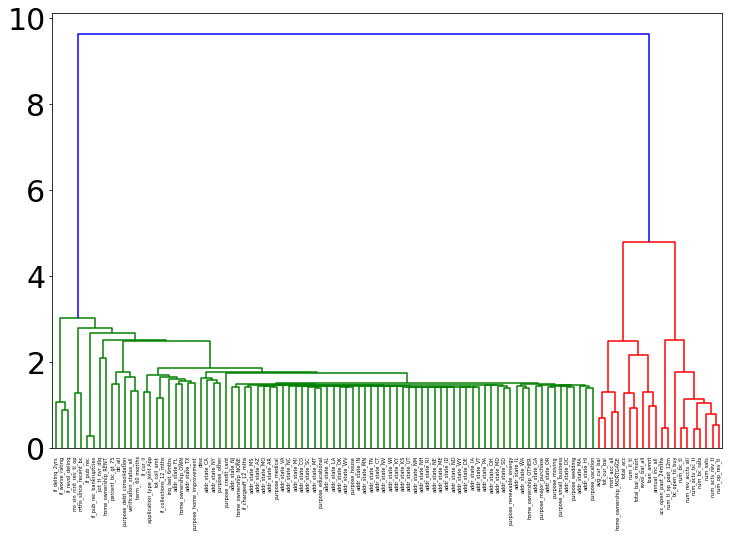

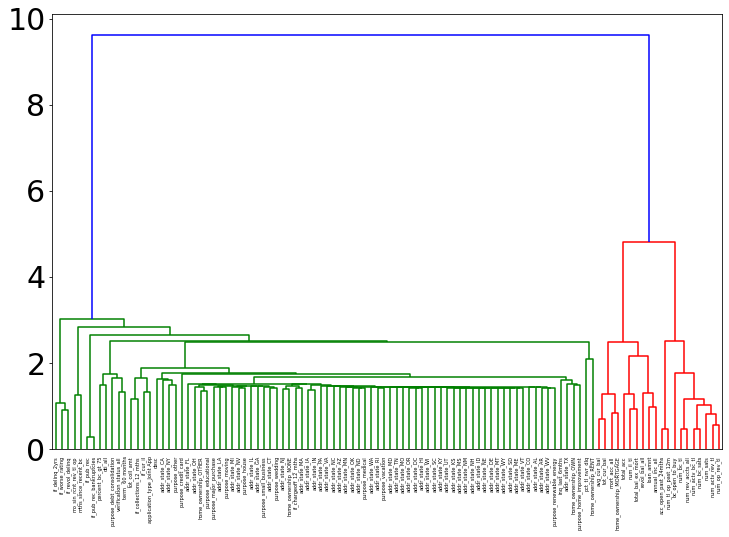

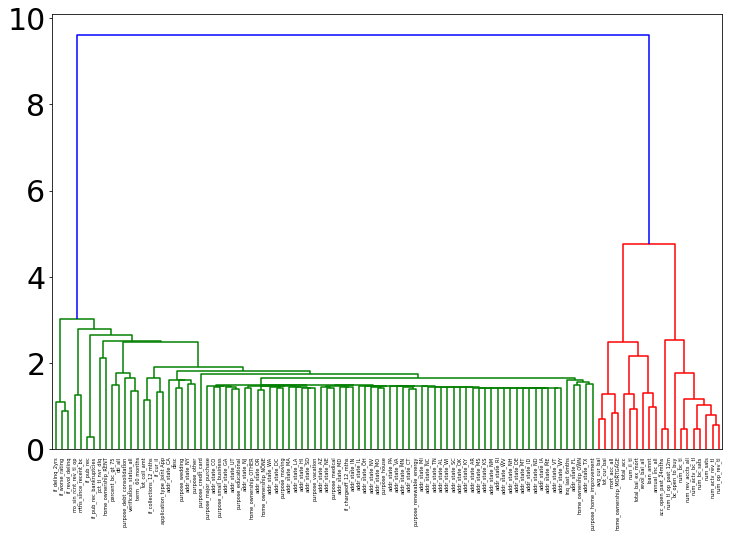

In [365]:
# Level 1
for i in [0,1,2,3,4]:
  print('set{}:'.format(i+1))  
  fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
  corr = spearmanr(X_train_corr.iloc[sets[i]]).correlation
  corr_linkage = hierarchy.ward(corr)
  dendro = hierarchy.dendrogram(corr_linkage, labels=X_train_corr.iloc[sets[i]].columns.values, ax=ax1,
                                leaf_rotation=90)
  dendro_idx = np.arange(0, len(dendro['ivl']))
  
  cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
  cluster_id_to_feature_ids = defaultdict(list)
  for idx, cluster_id in enumerate(cluster_ids):
      cluster_id_to_feature_ids[cluster_id].append(idx)
  selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
  print('Selected Features:',selected_features)
  print('Reduced {} features'.format(len(X_train.columns)-len(selected_features)))

In [0]:
# In here, we select all unique features selected in all sets
selected_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 19, 21, 22, 23, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]

In [367]:
# Calculating the probability with selected features
# Here we use un-altered data set, rather the one we use for correlation
%%time
y_prob_sel=list()
for i in range(5):
  print('set{} starts'.format(i+1))
  y_prob_sel.append(cross_val_predict(classifior, 
                                X_train.iloc[sets[i],selected_features],y_train[sets[i]], cv=5,method='predict_proba'))
  print('set{} ends'.format(i+1))

set1 starts
set1 ends
set2 starts
set2 ends
set3 starts
set3 ends
set4 starts
set4 ends
set5 starts
set5 ends
CPU times: user 36min 58s, sys: 10min 4s, total: 47min 2s
Wall time: 23min 54s


In [368]:
threshold=0.50
scores=pd.DataFrame(columns=['accuracy','f1_score','precision','recall'],index=range(25))
y_pred_sel=list()

for i in range(5):
  # print('Set{}'.format(i+1))
  for n in range(5):
    m=i*5+n
    y_pred_sel.append((y_prob_sel[i][fold_validate_index[m]][:,1]>threshold).astype(int))
    scores.iloc[m,:].loc['accuracy'] = metrics.accuracy_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])
    scores.iloc[m,:].loc['f1_score'] = metrics.f1_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])
    scores.iloc[m,:].loc['precision'] = metrics.precision_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])
    scores.iloc[m,:].loc['recall'] = metrics.recall_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.accuracy.mean(), scores.accuracy.std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores.f1_score.mean(), scores.f1_score.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores.precision.mean(), scores.precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores.recall.mean(), scores.recall.std() * 2))

Accuracy: 0.65 (+/- 0.01)
f1 Score: 0.65 (+/- 0.01)
Precision: 0.64 (+/- 0.01)
Recall: 0.65 (+/- 0.01)


###2.3.2 Level 2
- Select correlation linkage above level 2, therefore the threshold is 2
- **Level 2:** Reduced variables from 106 to 13 varialbe, with only 5% accuracy droped (60%)

set1:
Selected Features: [0, 1, 2, 3, 5, 7, 12, 16, 21, 23, 29, 91]
Reduced 94 features
set2:
Selected Features: [0, 1, 2, 3, 4, 5, 7, 12, 21, 23, 29, 91]
Reduced 94 features
set3:
Selected Features: [0, 1, 2, 3, 5, 7, 12, 16, 21, 23, 29, 91]
Reduced 94 features
set4:
Selected Features: [0, 1, 2, 3, 4, 5, 7, 21, 23, 29, 91]
Reduced 95 features
set5:
Selected Features: [0, 1, 2, 3, 5, 7, 12, 16, 21, 23, 29, 91]
Reduced 94 features


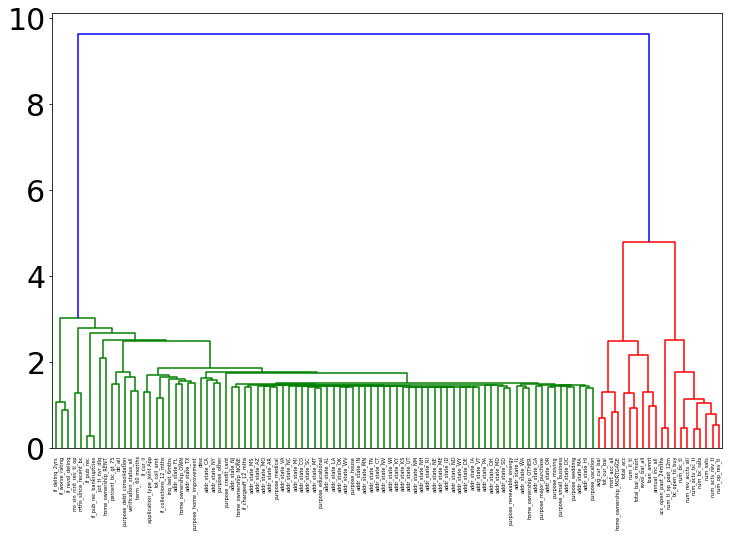

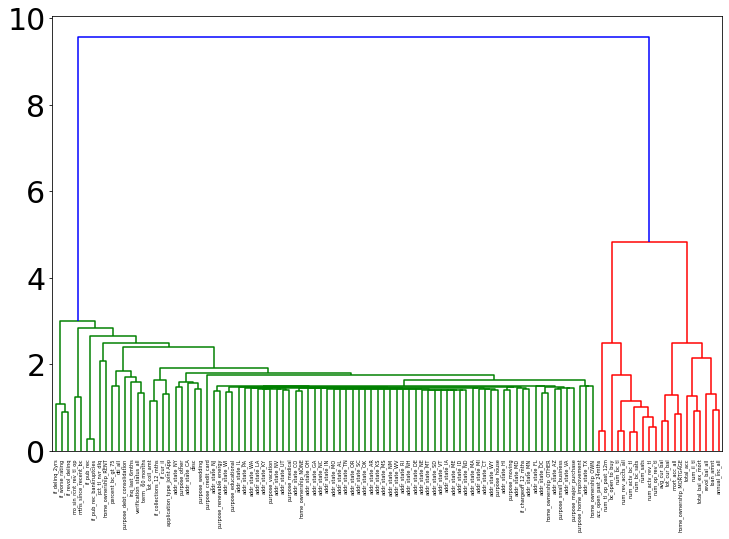

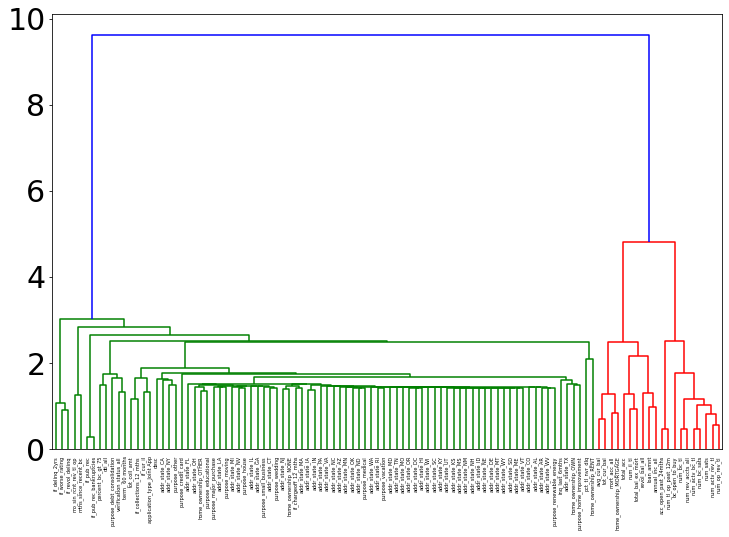

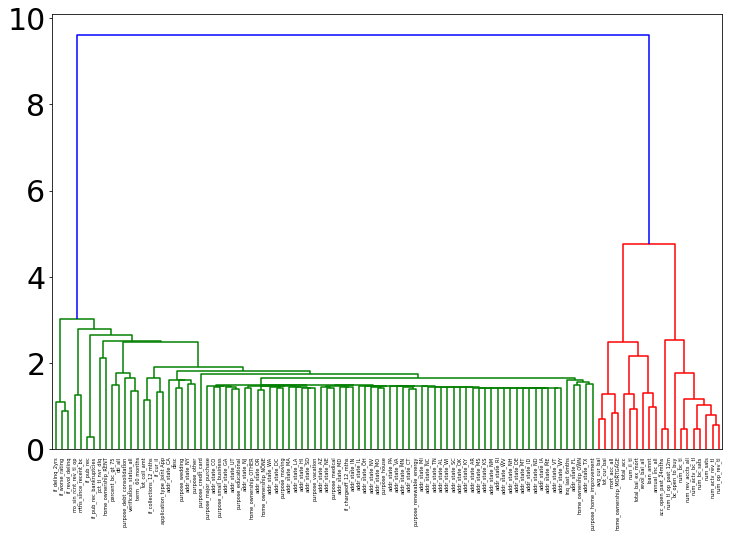

In [342]:
# Level 2
for i in [0,1,2,3,4]:
  print('set{}:'.format(i+1))  
  fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
  corr = spearmanr(X_train_corr.iloc[sets[i]]).correlation
  corr_linkage = hierarchy.ward(corr)
  dendro = hierarchy.dendrogram(corr_linkage, labels=X_train_corr.iloc[sets[i]].columns.values, ax=ax1,
                                leaf_rotation=90)
  dendro_idx = np.arange(0, len(dendro['ivl']))
  
  cluster_ids = hierarchy.fcluster(corr_linkage, 2, criterion='distance')
  cluster_id_to_feature_ids = defaultdict(list)
  for idx, cluster_id in enumerate(cluster_ids):
      cluster_id_to_feature_ids[cluster_id].append(idx)
  selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
  print('Selected Features:',selected_features)
  print('Reduced {} features'.format(len(X_train.columns)-len(selected_features)))

In [0]:
# In here, we select all unique features selected in all sets
selected_features = [0, 1, 2, 3, 4, 5, 7, 12, 16, 21, 23, 29, 91]

In [0]:
# Calculating the probability with selected features
# Here we use un-altered data set, rather the one we use for correlation
%%time
y_prob_sel=list()
for i in range(5):
  # print('set{} starts'.format(i+1))
  y_prob_sel.append(cross_val_predict(classifior, 
                                X_train.iloc[sets[i],selected_features],y_train[sets[i]], cv=5,method='predict_proba'))
  # print('set{} ends'.format(i+1))

In [361]:
threshold=0.50
scores=pd.DataFrame(columns=['accuracy','f1_score','precision','recall'],index=range(25))
y_pred_sel=list()

for i in range(5):
  # print('Set{}'.format(i+1))
  for n in range(5):
    m=i*5+n
    y_pred_sel.append((y_prob_sel[i][fold_validate_index[m]][:,1]>threshold).astype(int))
    scores.iloc[m,:].loc['accuracy'] = metrics.accuracy_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])
    scores.iloc[m,:].loc['f1_score'] = metrics.f1_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])
    scores.iloc[m,:].loc['precision'] = metrics.precision_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])
    scores.iloc[m,:].loc['recall'] = metrics.recall_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_sel[m])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.accuracy.mean(), scores.accuracy.std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores.f1_score.mean(), scores.f1_score.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores.precision.mean(), scores.precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores.recall.mean(), scores.recall.std() * 2))

Accuracy: 0.60 (+/- 0.01)
f1 Score: 0.60 (+/- 0.01)
Precision: 0.61 (+/- 0.01)
Recall: 0.59 (+/- 0.01)


##2.4 Feature Importance
- For Level 1 Features
- For Level 2 Features

The Calculation of feature importance is based on permutation importance

Ref: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

In [0]:
from sklearn.inspection import permutation_importance

In [0]:
# Selected Level 1 features
selected_features_1=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 19, 21, 22, 23, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
# Selected Level 2 features
selected_features_2=[0, 1, 2, 3, 4, 5, 7, 12, 16, 21, 23, 29, 91]

### 2.4.1 Feature Importance for Level 1 Features
- **Result:** Based on feature importance, variables reduced from 95 to 17 variables, with about 1% accuracy droped (64%)
- **Important Variables:**

  'term_ 60 months', 'acc_open_past_24mths', 'dti_all', 'total_acc', 'bc_open_to_buy', 'inq_last_6mths', 'home_ownership_RENT','loan_amnt', 'if_cur_il', 'percent_bc_gt_75', 'avg_cur_bal','verification_status_all', 'if_delinq_2yrs', 'purpose_credit_card','purpose_small_business', 'mort_acc_all', 'home_ownership_OWN'

Set 1 Starts
Fold 1/5


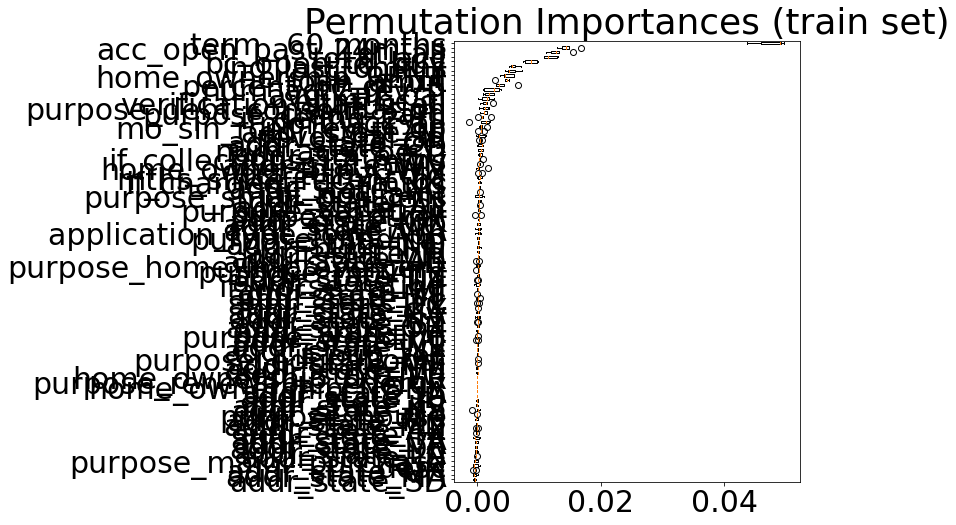

Index(['addr_state_SD', 'addr_state_MA', 'addr_state_NH', 'desc',
       'purpose_major_purchase', 'addr_state_IN', 'addr_state_LA',
       'addr_state_DE', 'addr_state_VA', 'addr_state_CA', 'addr_state_HI',
       'addr_state_AZ', 'addr_state_MN', 'addr_state_MS', 'purpose_house',
       'addr_state_NY', 'addr_state_KS', 'addr_state_RI', 'addr_state_ID',
       'addr_state_IA', 'home_ownership_NONE', 'purpose_renewable_energy',
       'home_ownership_OTHER', 'addr_state_WI', 'addr_state_NM',
       'addr_state_ME', 'purpose_educational', 'if_pub_rec', 'addr_state_WY',
       'addr_state_NE', 'addr_state_VT', 'purpose_wedding', 'addr_state_PA',
       'addr_state_OH', 'addr_state_CT', 'addr_state_NV', 'addr_state_GA',
       'addr_state_KY', 'addr_state_DC', 'addr_state_FL', 'addr_state_MT',
       'addr_state_MI', 'if_worse_rating', 'addr_state_UT', 'addr_state_TX',
       'purpose_moving', 'purpose_home_improvement', 'addr_state_MD',
       'addr_state_AR', 'addr_state_IL', 'num_il_t

Index(['addr_state_OH', 'if_delinq_2yrs', 'num_bc_tl', 'num_actv_rev_tl',
       'addr_state_NC', 'addr_state_AL', 'desc', 'num_il_tl', 'addr_state_TN',
       'purpose_other', 'addr_state_KS', 'addr_state_WA', 'addr_state_CT',
       'addr_state_VA', 'addr_state_NE', 'addr_state_PA', 'addr_state_GA',
       'purpose_wedding', 'if_chargeoff_12_mths', 'addr_state_NJ',
       'purpose_moving', 'addr_state_MI', 'addr_state_ID', 'addr_state_DC',
       'purpose_house', 'addr_state_AZ', 'addr_state_MN', 'addr_state_MA',
       'addr_state_MT', 'addr_state_IA', 'home_ownership_OTHER',
       'home_ownership_NONE', 'purpose_educational', 'addr_state_NM',
       'addr_state_UT', 'addr_state_IN', 'addr_state_KY', 'addr_state_LA',
       'purpose_renewable_energy', 'addr_state_TX', 'addr_state_ME',
       'addr_state_RI', 'addr_state_ND', 'addr_state_SD', 'addr_state_VT',
       'addr_state_NV', 'addr_state_SC', 'addr_state_MD', 'addr_state_WV',
       'addr_state_WI', 'addr_state_MS', 'addr_sta

Index(['purpose_credit_card', 'addr_state_TN', 'pct_tl_nvr_dlq',
       'addr_state_NJ', 'num_actv_bc_tl', 'if_collections_12_mths',
       'addr_state_AZ', 'addr_state_FL', 'addr_state_CT', 'addr_state_TX',
       'addr_state_AL', 'addr_state_ME', 'addr_state_RI', 'addr_state_NE',
       'addr_state_NM', 'addr_state_VA', 'addr_state_MD', 'addr_state_MT',
       'addr_state_KY', 'addr_state_NY', 'addr_state_IN', 'addr_state_CO',
       'purpose_educational', 'purpose_renewable_energy', 'addr_state_WY',
       'addr_state_IA', 'addr_state_ND', 'addr_state_ID', 'addr_state_CA',
       'home_ownership_OTHER', 'home_ownership_NONE', 'addr_state_DC',
       'addr_state_SD', 'addr_state_WA', 'addr_state_MI', 'addr_state_OH',
       'application_type_Joint App', 'purpose_house', 'addr_state_AR',
       'purpose_wedding', 'addr_state_UT', 'revol_bal_all',
       'purpose_home_improvement', 'purpose_vacation', 'purpose_moving',
       'addr_state_NV', 'addr_state_PA', 'addr_state_HI', 'addr_sta

Index(['addr_state_CO', 'addr_state_NJ', 'addr_state_MO', 'addr_state_KS',
       'addr_state_DC', 'purpose_major_purchase', 'addr_state_PA',
       'addr_state_AR', 'addr_state_MN', 'addr_state_KY', 'addr_state_RI',
       'addr_state_FL', 'addr_state_NM', 'addr_state_ID',
       'if_collections_12_mths', 'purpose_wedding', 'home_ownership_NONE',
       'addr_state_IA', 'addr_state_CT', 'purpose_house',
       'home_ownership_OTHER', 'application_type_Joint App',
       'purpose_renewable_energy', 'if_chargeoff_12_mths', 'addr_state_MT',
       'addr_state_MI', 'addr_state_HI', 'addr_state_WY', 'purpose_medical',
       'purpose_vacation', 'purpose_educational', 'addr_state_GA',
       'addr_state_WI', 'addr_state_ME', 'addr_state_VT', 'addr_state_MS',
       'addr_state_NH', 'desc', 'addr_state_NE', 'addr_state_WV',
       'addr_state_NV', 'addr_state_SD', 'addr_state_VA', 'addr_state_TX',
       'addr_state_IN', 'addr_state_DE', 'addr_state_UT', 'addr_state_MD',
       'addr_state_M

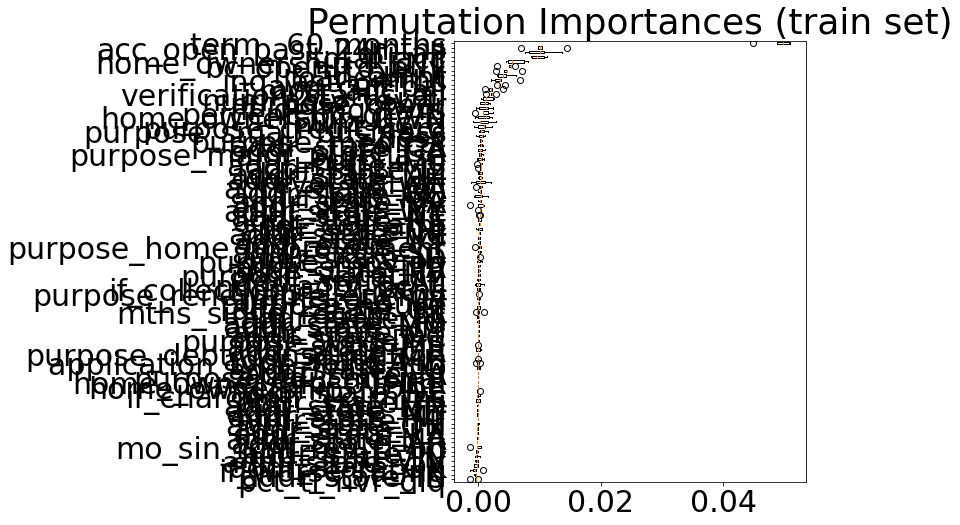

Index(['pct_tl_nvr_dlq', 'addr_state_IN', 'if_worse_rating', 'addr_state_OK',
       'addr_state_WV', 'addr_state_TN', 'addr_state_RI',
       'mo_sin_rcnt_rev_tl_op', 'addr_state_AR', 'addr_state_MA',
       'addr_state_LA', 'addr_state_TX', 'addr_state_OH', 'addr_state_MI',
       'addr_state_MT', 'addr_state_ND', 'addr_state_MN', 'addr_state_FL',
       'if_chargeoff_12_mths', 'addr_state_DE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'purpose_educational', 'addr_state_IA',
       'addr_state_CO', 'application_type_Joint App', 'addr_state_MD',
       'purpose_debt_consolidation', 'addr_state_OR', 'addr_state_ME',
       'purpose_wedding', 'addr_state_DC', 'addr_state_CT', 'addr_state_NM',
       'addr_state_MO', 'addr_state_HI', 'mths_since_recent_bc',
       'addr_state_UT', 'purpose_house', 'addr_state_WI',
       'purpose_renewable_energy', 'if_collections_12_mths', 'num_actv_bc_tl',
       'addr_state_AL', 'purpose_vacation', 'addr_state_NV', 'addr_state_PA',
       

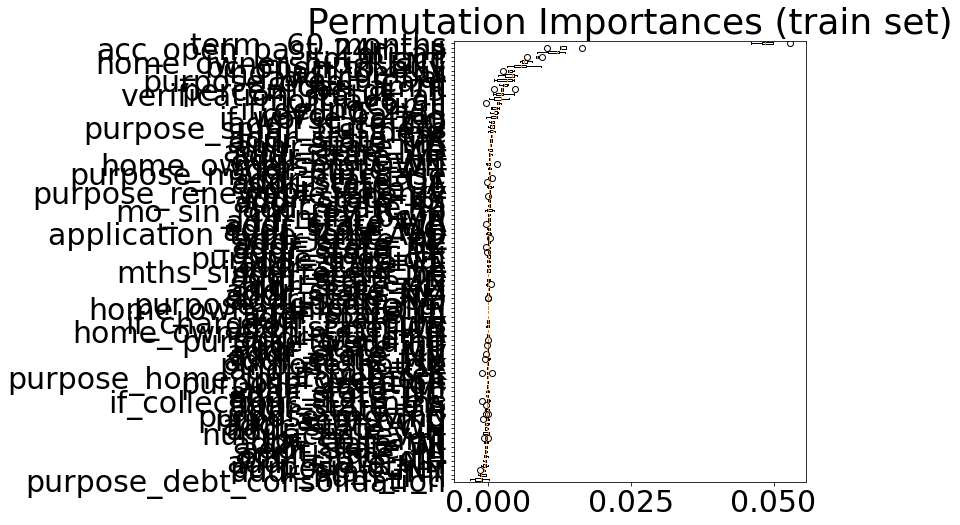

Index(['purpose_debt_consolidation', 'num_il_tl', 'addr_state_NY',
       'purpose_other', 'addr_state_NH', 'pct_tl_nvr_dlq', 'addr_state_PA',
       'addr_state_NJ', 'addr_state_WI', 'tot_coll_amt', 'num_actv_rev_tl',
       'addr_state_OH', 'addr_state_WV', 'num_actv_bc_tl', 'purpose_moving',
       'addr_state_TN', 'addr_state_GA', 'if_collections_12_mths',
       'addr_state_DC', 'addr_state_NC', 'addr_state_MI', 'purpose_vacation',
       'purpose_home_improvement', 'if_pub_rec', 'addr_state_OK',
       'purpose_house', 'addr_state_MN', 'addr_state_NV', 'addr_state_ME',
       'addr_state_CT', 'purpose_wedding', 'addr_state_ID',
       'home_ownership_OTHER', 'addr_state_WY', 'if_chargeoff_12_mths',
       'addr_state_HI', 'addr_state_IA', 'home_ownership_NONE',
       'purpose_educational', 'addr_state_SD', 'addr_state_NM',
       'addr_state_ND', 'addr_state_AZ', 'addr_state_IN', 'addr_state_DE',
       'mths_since_recent_bc', 'addr_state_VA', 'addr_state_FL',
       'purpose_me

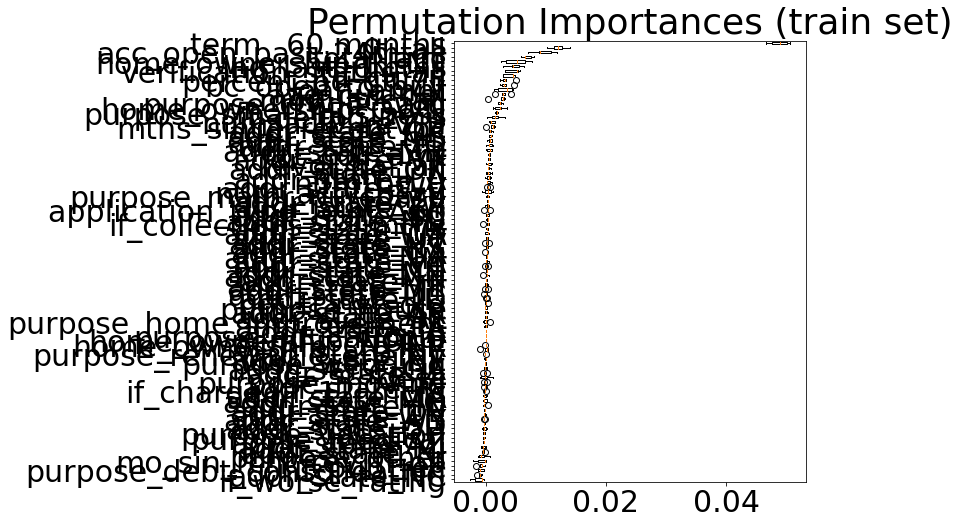

Index(['if_worse_rating', 'addr_state_NC', 'purpose_debt_consolidation',
       'if_pub_rec', 'mo_sin_rcnt_rev_tl_op', 'purpose_other', 'addr_state_NJ',
       'addr_state_MI', 'addr_state_AZ', 'purpose_medical', 'purpose_vacation',
       'addr_state_OH', 'addr_state_SD', 'addr_state_WY', 'addr_state_TN',
       'addr_state_DE', 'addr_state_IN', 'addr_state_MO', 'addr_state_MA',
       'if_chargeoff_12_mths', 'addr_state_RI', 'purpose_moving', 'desc',
       'addr_state_IL', 'addr_state_GA', 'purpose_wedding', 'addr_state_NE',
       'purpose_renewable_energy', 'addr_state_NY', 'home_ownership_OTHER',
       'home_ownership_NONE', 'purpose_educational', 'addr_state_IA',
       'addr_state_PA', 'purpose_home_improvement', 'addr_state_AL',
       'addr_state_AR', 'purpose_house', 'pct_tl_nvr_dlq', 'addr_state_ID',
       'addr_state_DC', 'addr_state_MT', 'addr_state_ME', 'addr_state_HI',
       'addr_state_MN', 'addr_state_NH', 'addr_state_CT', 'addr_state_VA',
       'addr_state_NM', '

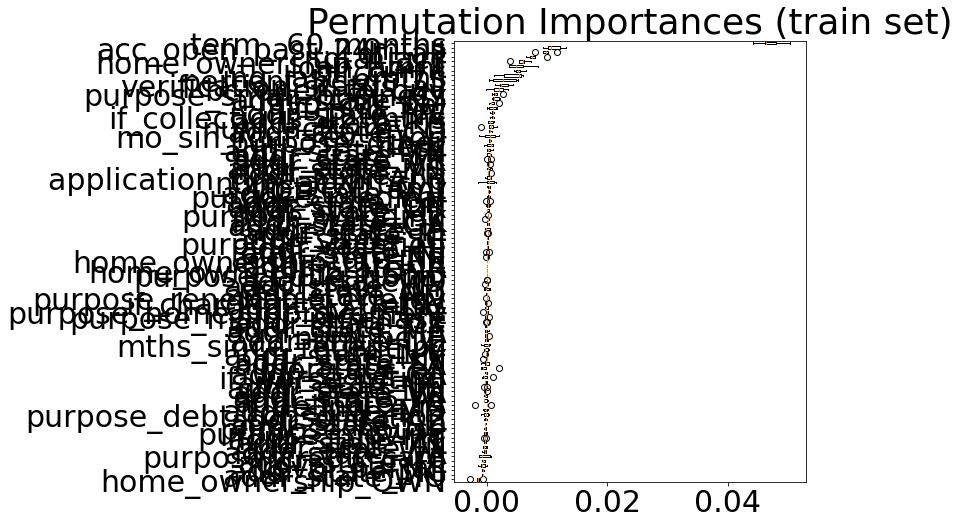

Index(['home_ownership_OWN', 'addr_state_MO', 'addr_state_NC', 'revol_bal_all',
       'addr_state_FL', 'purpose_credit_card', 'addr_state_WA',
       'addr_state_IN', 'addr_state_AL', 'addr_state_MT', 'purpose_moving',
       'purpose_house', 'addr_state_SD', 'addr_state_AZ',
       'purpose_debt_consolidation', 'addr_state_MD', 'if_delinq_2yrs',
       'addr_state_PA', 'addr_state_WI', 'addr_state_VA', 'addr_state_NH',
       'addr_state_MI', 'if_worse_rating', 'addr_state_CA', 'mort_acc_all',
       'addr_state_LA', 'addr_state_KY', 'addr_state_NM', 'num_il_tl',
       'mths_since_recent_bc', 'addr_state_DE', 'num_bc_tl', 'addr_state_MA',
       'addr_state_ME', 'addr_state_CT', 'purpose_major_purchase',
       'purpose_home_improvement', 'addr_state_DC', 'if_chargeoff_12_mths',
       'purpose_renewable_energy', 'addr_state_ND', 'pct_tl_nvr_dlq',
       'addr_state_WY', 'addr_state_ID', 'purpose_educational',
       'home_ownership_NONE', 'addr_state_IA', 'home_ownership_OTHER',
  

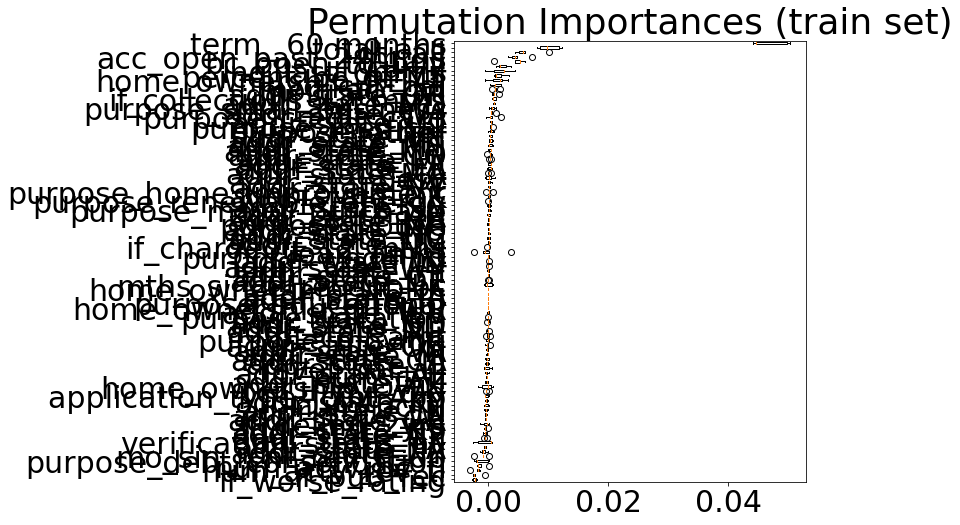

Index(['if_worse_rating', 'if_pub_rec', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'purpose_debt_consolidation', 'mo_sin_rcnt_rev_tl_op', 'addr_state_NY',
       'addr_state_PA', 'verification_status_all', 'addr_state_TX',
       'addr_state_NE', 'addr_state_KS', 'if_delinq_2yrs', 'addr_state_GA',
       'addr_state_WI', 'addr_state_IN', 'num_bc_tl', 'addr_state_KY',
       'application_type_Joint App', 'pct_tl_nvr_dlq', 'home_ownership_OWN',
       'addr_state_AZ', 'num_il_tl', 'addr_state_AL', 'revol_bal_all',
       'addr_state_IL', 'addr_state_CA', 'addr_state_NJ', 'addr_state_VA',
       'addr_state_OH', 'purpose_moving', 'tot_coll_amt', 'addr_state_ME',
       'addr_state_ND', 'addr_state_SD', 'purpose_vacation', 'addr_state_WV',
       'home_ownership_OTHER', 'purpose_educational', 'addr_state_RI',
       'addr_state_IA', 'home_ownership_NONE', 'mths_since_recent_bc',
       'addr_state_DE', 'addr_state_CT', 'addr_state_HI', 'addr_state_WY',
       'addr_state_ID', 'purpose_wed

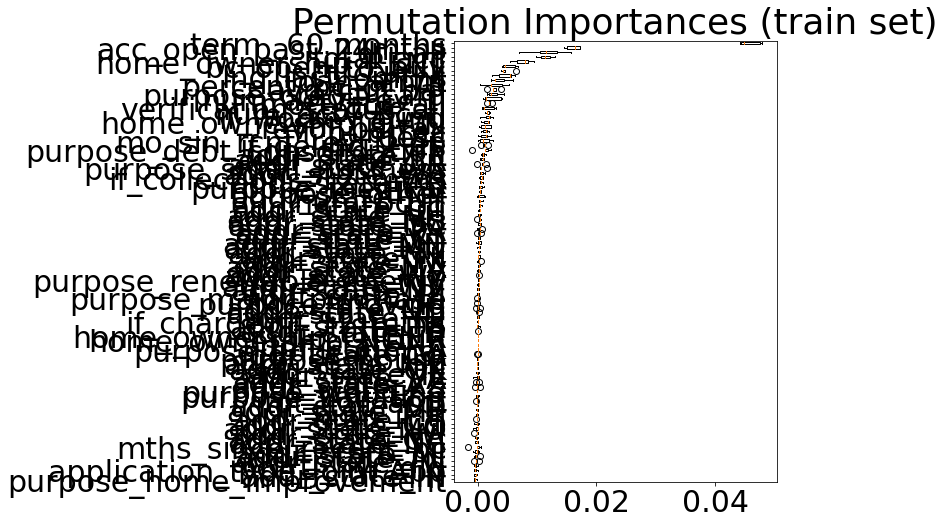

Index(['purpose_home_improvement', 'addr_state_IN',
       'application_type_Joint App', 'pct_tl_nvr_dlq', 'addr_state_TN',
       'addr_state_AL', 'addr_state_MI', 'mths_since_recent_bc',
       'addr_state_NC', 'addr_state_GA', 'addr_state_WI', 'addr_state_MO',
       'addr_state_CO', 'addr_state_CT', 'num_il_tl', 'addr_state_ME',
       'addr_state_SD', 'tot_coll_amt', 'purpose_vacation', 'purpose_wedding',
       'addr_state_KS', 'addr_state_AZ', 'addr_state_VA', 'addr_state_IL',
       'addr_state_OK', 'addr_state_NM', 'purpose_house', 'addr_state_CA',
       'purpose_educational', 'addr_state_IA', 'home_ownership_NONE',
       'home_ownership_OTHER', 'addr_state_ID', 'addr_state_DE',
       'if_chargeoff_12_mths', 'addr_state_HI', 'addr_state_ND',
       'addr_state_OH', 'purpose_moving', 'purpose_major_purchase',
       'addr_state_RI', 'addr_state_NE', 'addr_state_WV',
       'purpose_renewable_energy', 'addr_state_WY', 'addr_state_NV',
       'addr_state_MA', 'addr_state_TX', 

Index(['addr_state_IN', 'num_actv_rev_tl', 'addr_state_NY', 'addr_state_CO',
       'addr_state_TX', 'addr_state_CT', 'if_collections_12_mths',
       'addr_state_OH', 'mo_sin_rcnt_rev_tl_op', 'revol_bal_all',
       'purpose_medical', 'addr_state_NM', 'addr_state_MN', 'addr_state_KS',
       'desc', 'addr_state_ND', 'if_chargeoff_12_mths', 'addr_state_WV',
       'addr_state_TN', 'addr_state_PA', 'addr_state_IL', 'purpose_moving',
       'addr_state_WI', 'addr_state_VA', 'num_il_tl', 'addr_state_MA',
       'tot_coll_amt', 'addr_state_RI', 'addr_state_UT', 'num_bc_tl',
       'home_ownership_OTHER', 'addr_state_IA', 'home_ownership_NONE',
       'addr_state_WA', 'purpose_educational', 'addr_state_AR',
       'purpose_house', 'addr_state_NH', 'addr_state_MD', 'addr_state_DE',
       'addr_state_CA', 'addr_state_WY', 'addr_state_KY', 'addr_state_GA',
       'addr_state_NV', 'addr_state_OK', 'purpose_home_improvement',
       'purpose_renewable_energy', 'num_actv_bc_tl',
       'applicat

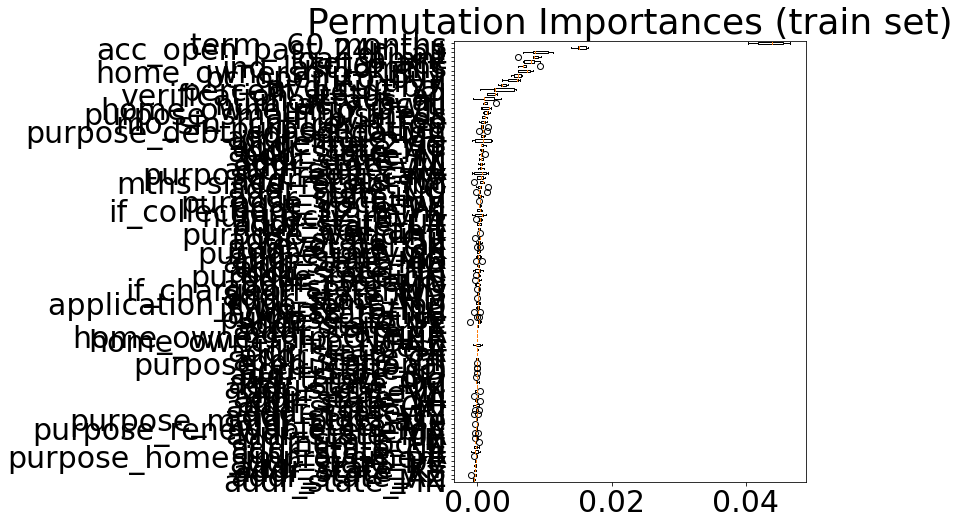

Index(['addr_state_MN', 'addr_state_AZ', 'addr_state_KS', 'addr_state_KY',
       'addr_state_DE', 'purpose_home_improvement', 'addr_state_CA',
       'addr_state_NE', 'num_bc_tl', 'addr_state_TN', 'addr_state_MA',
       'purpose_renewable_energy', 'addr_state_ME', 'purpose_major_purchase',
       'addr_state_WY', 'addr_state_RI', 'addr_state_OH', 'addr_state_MI',
       'addr_state_VA', 'addr_state_IL', 'addr_state_NM', 'addr_state_DC',
       'pct_tl_nvr_dlq', 'addr_state_SD', 'addr_state_ID',
       'purpose_educational', 'addr_state_CT', 'addr_state_HI',
       'addr_state_GA', 'desc', 'home_ownership_NONE', 'home_ownership_OTHER',
       'addr_state_IA', 'addr_state_VT', 'addr_state_FL', 'purpose_house',
       'addr_state_NH', 'if_worse_rating', 'application_type_Joint App',
       'addr_state_ND', 'addr_state_WV', 'if_chargeoff_12_mths',
       'addr_state_MD', 'addr_state_IN', 'purpose_medical', 'addr_state_NC',
       'addr_state_PA', 'addr_state_MO', 'addr_state_AR', 'purpos

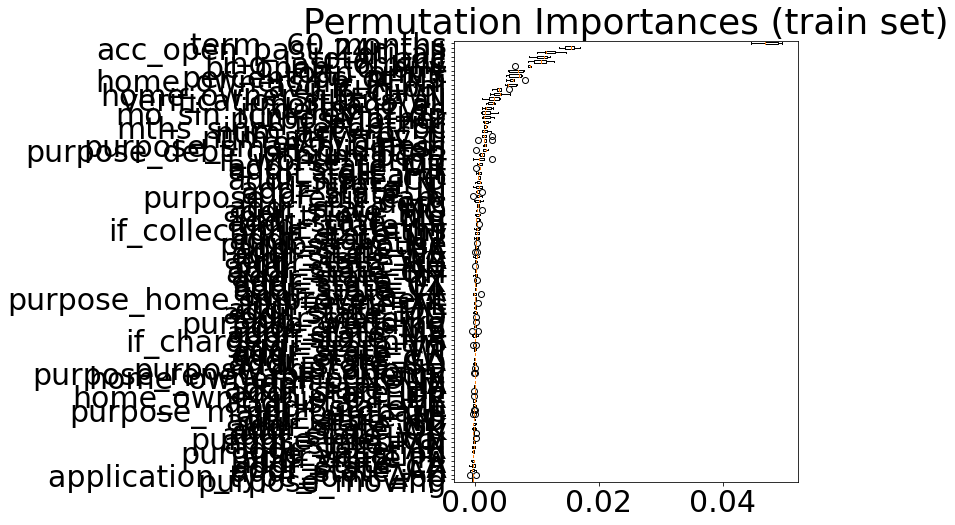

Index(['purpose_moving', 'application_type_Joint App', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_LA', 'addr_state_RI', 'purpose_vacation',
       'addr_state_AR', 'addr_state_MN', 'purpose_medical', 'addr_state_WV',
       'addr_state_OK', 'addr_state_SC', 'addr_state_ND', 'addr_state_MI',
       'purpose_major_purchase', 'addr_state_IL', 'addr_state_WY',
       'home_ownership_OTHER', 'addr_state_DE', 'addr_state_NM',
       'addr_state_IA', 'home_ownership_NONE', 'purpose_renewable_energy',
       'purpose_educational', 'addr_state_SD', 'addr_state_GA',
       'addr_state_WI', 'addr_state_TN', 'addr_state_VT',
       'if_chargeoff_12_mths', 'addr_state_MA', 'addr_state_ME',
       'addr_state_KS', 'purpose_wedding', 'addr_state_ID', 'addr_state_MD',
       'addr_state_DC', 'addr_state_AL', 'purpose_home_improvement',
       'addr_state_FL', 'addr_state_VA', 'addr_state_CT', 'addr_state_TX',
       'addr_state_NY', 'addr_state_OH', 'addr_state_NH', 'addr_state_KY',
       '

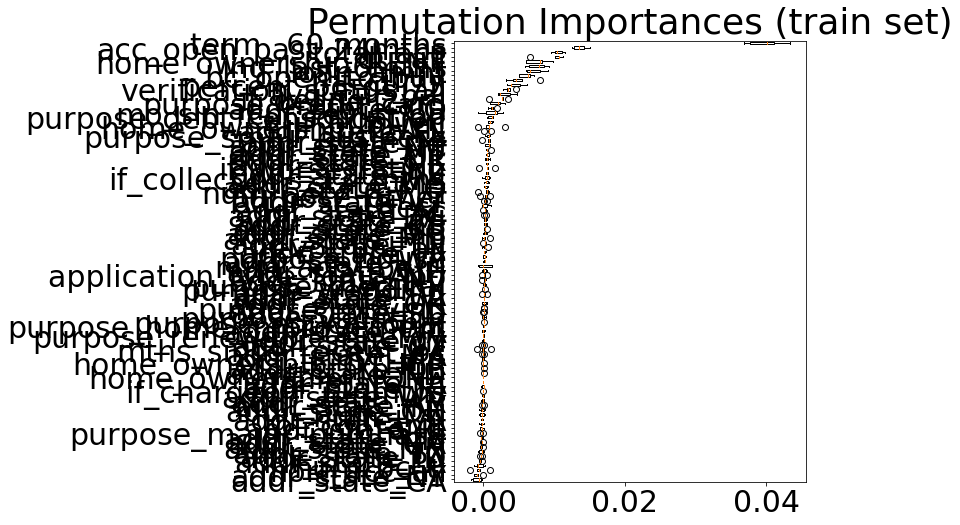

Index(['addr_state_CA', 'addr_state_NY', 'mort_acc_all', 'num_bc_tl',
       'addr_state_PA', 'addr_state_ID', 'addr_state_TX', 'addr_state_MN',
       'addr_state_GA', 'addr_state_NM', 'purpose_major_purchase',
       'addr_state_IL', 'tot_coll_amt', 'addr_state_VA', 'num_il_tl',
       'addr_state_OH', 'addr_state_KY', 'addr_state_AR', 'addr_state_WV',
       'if_chargeoff_12_mths', 'addr_state_RI', 'addr_state_IA',
       'home_ownership_NONE', 'addr_state_ND', 'addr_state_DE',
       'home_ownership_OTHER', 'pct_tl_nvr_dlq', 'addr_state_MA',
       'mths_since_recent_bc', 'addr_state_CT', 'addr_state_IN',
       'purpose_renewable_energy', 'addr_state_WA', 'purpose_home_improvement',
       'purpose_educational', 'purpose_vacation', 'addr_state_SD',
       'purpose_moving', 'addr_state_OK', 'addr_state_WI', 'addr_state_LA',
       'purpose_wedding', 'purpose_medical', 'addr_state_NV',
       'application_type_Joint App', 'addr_state_NH', 'num_actv_bc_tl',
       'addr_state_WY', 'p

Index(['if_worse_rating', 'addr_state_MN', 'addr_state_MI', 'addr_state_CA',
       'addr_state_NC', 'addr_state_KS', 'pct_tl_nvr_dlq', 'addr_state_ME',
       'addr_state_VT', 'purpose_moving', 'addr_state_IL', 'addr_state_DC',
       'addr_state_MA', 'num_il_tl', 'addr_state_AR', 'addr_state_WY',
       'num_bc_tl', 'addr_state_MD', 'addr_state_NV', 'addr_state_WI',
       'addr_state_DE', 'home_ownership_OTHER', 'addr_state_ND',
       'addr_state_KY', 'tot_coll_amt', 'if_chargeoff_12_mths',
       'addr_state_IA', 'purpose_house', 'home_ownership_NONE',
       'purpose_major_purchase', 'purpose_renewable_energy', 'addr_state_FL',
       'addr_state_SC', 'addr_state_ID', 'purpose_educational',
       'purpose_home_improvement', 'purpose_vacation', 'addr_state_CT',
       'addr_state_VA', 'revol_bal_all', 'addr_state_NM', 'purpose_wedding',
       'addr_state_GA', 'addr_state_MO', 'addr_state_MS',
       'verification_status_all', 'addr_state_HI', 'addr_state_LA',
       'addr_state_

Index(['home_ownership_OWN', 'addr_state_OH', 'addr_state_MO', 'num_il_tl',
       'addr_state_FL', 'addr_state_NJ', 'addr_state_MN', 'if_pub_rec',
       'addr_state_CT', 'addr_state_GA', 'if_worse_rating', 'num_actv_bc_tl',
       'addr_state_TX', 'addr_state_WA', 'num_actv_rev_tl', 'addr_state_AZ',
       'addr_state_PA', 'addr_state_NV', 'mths_since_recent_bc',
       'purpose_vacation', 'addr_state_NC', 'purpose_renewable_energy',
       'addr_state_TN', 'addr_state_KS', 'addr_state_IL',
       'if_collections_12_mths', 'addr_state_SD', 'purpose_house',
       'addr_state_AL', 'addr_state_UT', 'addr_state_MT', 'addr_state_NH',
       'desc', 'home_ownership_NONE', 'home_ownership_OTHER', 'addr_state_IA',
       'addr_state_WY', 'addr_state_ME', 'addr_state_DE',
       'mo_sin_rcnt_rev_tl_op', 'addr_state_VA', 'addr_state_HI',
       'addr_state_ID', 'addr_state_ND', 'addr_state_LA',
       'purpose_home_improvement', 'mort_acc_all', 'if_chargeoff_12_mths',
       'purpose_wedding'

Index(['if_worse_rating', 'purpose_vacation', 'num_bc_tl', 'pct_tl_nvr_dlq',
       'if_pub_rec', 'addr_state_PA', 'addr_state_SC', 'addr_state_TX',
       'tot_coll_amt', 'num_il_tl', 'addr_state_MN', 'addr_state_IN',
       'addr_state_CT', 'addr_state_NE', 'addr_state_WI', 'addr_state_SD',
       'addr_state_MA', 'addr_state_UT', 'addr_state_HI', 'addr_state_MO',
       'addr_state_MI', 'addr_state_LA', 'addr_state_KY',
       'application_type_Joint App', 'purpose_debt_consolidation',
       'if_chargeoff_12_mths', 'addr_state_CA', 'addr_state_NC',
       'addr_state_KS', 'addr_state_WA', 'num_actv_bc_tl', 'purpose_house',
       'addr_state_VA', 'home_ownership_NONE', 'home_ownership_OTHER',
       'addr_state_IA', 'addr_state_RI', 'purpose_educational',
       'addr_state_FL', 'addr_state_OR', 'purpose_wedding', 'addr_state_ND',
       'addr_state_ID', 'addr_state_AL', 'purpose_major_purchase',
       'addr_state_WY', 'addr_state_WV', 'addr_state_MT', 'addr_state_OH',
       'add

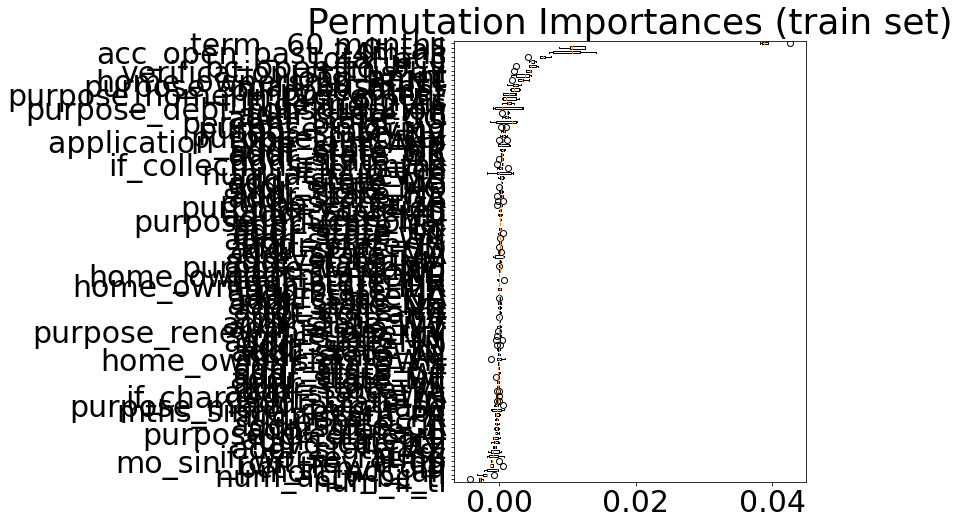

Index(['num_il_tl', 'num_actv_bc_tl', 'mort_acc_all', 'pct_tl_nvr_dlq',
       'mo_sin_rcnt_rev_tl_op', 'if_worse_rating', 'desc', 'addr_state_AZ',
       'avg_cur_bal', 'addr_state_NJ', 'purpose_credit_card', 'addr_state_IL',
       'addr_state_CA', 'num_bc_tl', 'addr_state_PA', 'mths_since_recent_bc',
       'purpose_major_purchase', 'addr_state_IN', 'if_chargeoff_12_mths',
       'addr_state_WA', 'addr_state_MI', 'addr_state_VT', 'addr_state_DE',
       'addr_state_WI', 'addr_state_CT', 'addr_state_KS', 'home_ownership_OWN',
       'addr_state_AL', 'addr_state_TN', 'addr_state_ID', 'addr_state_MN',
       'addr_state_KY', 'purpose_renewable_energy', 'addr_state_MT',
       'addr_state_WV', 'addr_state_LA', 'tot_coll_amt', 'addr_state_VA',
       'addr_state_NH', 'addr_state_NC', 'addr_state_IA', 'addr_state_ME',
       'home_ownership_OTHER', 'addr_state_OH', 'home_ownership_NONE',
       'addr_state_ND', 'purpose_wedding', 'addr_state_NM', 'revol_bal_all',
       'addr_state_MA', '

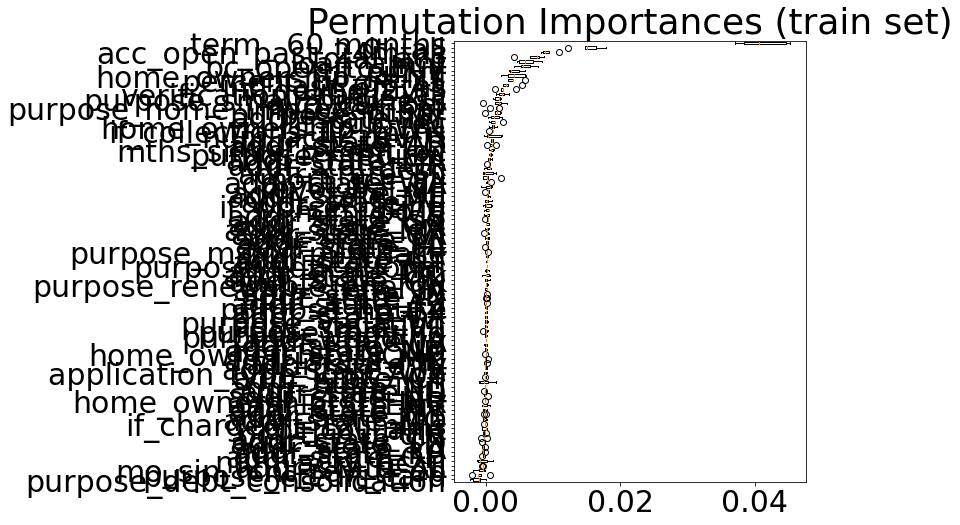

Index(['purpose_debt_consolidation', 'purpose_credit_card',
       'mo_sin_rcnt_rev_tl_op', 'addr_state_AL', 'num_actv_bc_tl',
       'addr_state_OH', 'addr_state_KS', 'addr_state_LA', 'addr_state_SD',
       'addr_state_TN', 'pct_tl_nvr_dlq', 'tot_coll_amt',
       'if_chargeoff_12_mths', 'addr_state_MO', 'addr_state_DE',
       'addr_state_MT', 'addr_state_NV', 'home_ownership_OTHER',
       'addr_state_NH', 'addr_state_ID', 'addr_state_NC', 'num_il_tl',
       'addr_state_CT', 'application_type_Joint App', 'addr_state_WV',
       'addr_state_IL', 'addr_state_MN', 'home_ownership_NONE',
       'addr_state_ND', 'addr_state_WY', 'addr_state_IA', 'purpose_wedding',
       'purpose_moving', 'addr_state_VT', 'purpose_vacation', 'addr_state_WI',
       'addr_state_TX', 'purpose_house', 'addr_state_AZ', 'addr_state_RI',
       'addr_state_IN', 'addr_state_VA', 'purpose_renewable_energy',
       'addr_state_OK', 'addr_state_MD', 'addr_state_DC',
       'purpose_educational', 'addr_state_UT',

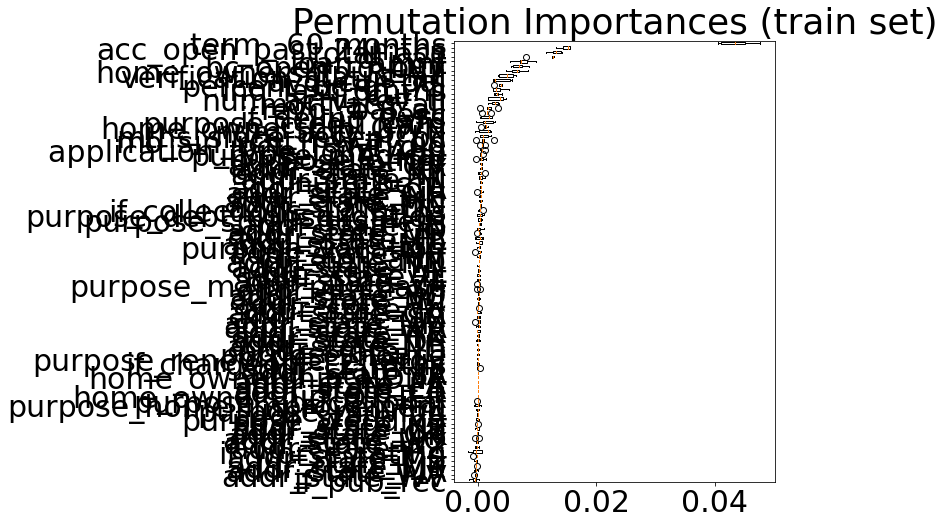

Index(['if_pub_rec', 'addr_state_WV', 'addr_state_MA', 'addr_state_MT',
       'num_il_tl', 'addr_state_MS', 'if_worse_rating', 'addr_state_AZ',
       'addr_state_WY', 'addr_state_MO', 'addr_state_OK', 'addr_state_UT',
       'addr_state_KS', 'purpose_wedding', 'addr_state_VA', 'purpose_moving',
       'purpose_home_improvement', 'purpose_educational',
       'home_ownership_OTHER', 'addr_state_CT', 'addr_state_LA',
       'addr_state_PA', 'home_ownership_NONE', 'addr_state_IA',
       'addr_state_HI', 'if_chargeoff_12_mths', 'purpose_renewable_energy',
       'purpose_house', 'addr_state_ID', 'addr_state_NH', 'addr_state_DE',
       'addr_state_TX', 'addr_state_AR', 'addr_state_WA', 'addr_state_NM',
       'addr_state_SC', 'addr_state_GA', 'addr_state_RI', 'addr_state_WI',
       'addr_state_NC', 'addr_state_SD', 'addr_state_MI',
       'purpose_major_purchase', 'addr_state_VT', 'addr_state_IL',
       'addr_state_AL', 'addr_state_TN', 'addr_state_ND', 'tot_coll_amt',
       'addr_st

Index(['if_collections_12_mths', 'addr_state_AZ', 'addr_state_LA',
       'addr_state_HI', 'if_pub_rec', 'addr_state_MS', 'addr_state_WV',
       'addr_state_MA', 'addr_state_MI', 'addr_state_DC', 'addr_state_VA',
       'addr_state_CT', 'addr_state_MT', 'addr_state_VT', 'addr_state_TN',
       'addr_state_NV', 'addr_state_WY', 'addr_state_DE', 'addr_state_NH',
       'addr_state_IA', 'home_ownership_OTHER', 'home_ownership_NONE',
       'addr_state_NE', 'addr_state_SD', 'addr_state_GA', 'addr_state_ID',
       'addr_state_PA', 'purpose_educational', 'addr_state_MN',
       'purpose_medical', 'addr_state_IN', 'purpose_moving', 'addr_state_TX',
       'addr_state_SC', 'addr_state_MD', 'purpose_major_purchase',
       'purpose_house', 'addr_state_ME', 'addr_state_ND', 'addr_state_OH',
       'purpose_wedding', 'addr_state_MO', 'if_chargeoff_12_mths',
       'addr_state_RI', 'addr_state_KY', 'purpose_renewable_energy',
       'addr_state_NC', 'tot_coll_amt', 'addr_state_OK', 'purpose_vaca

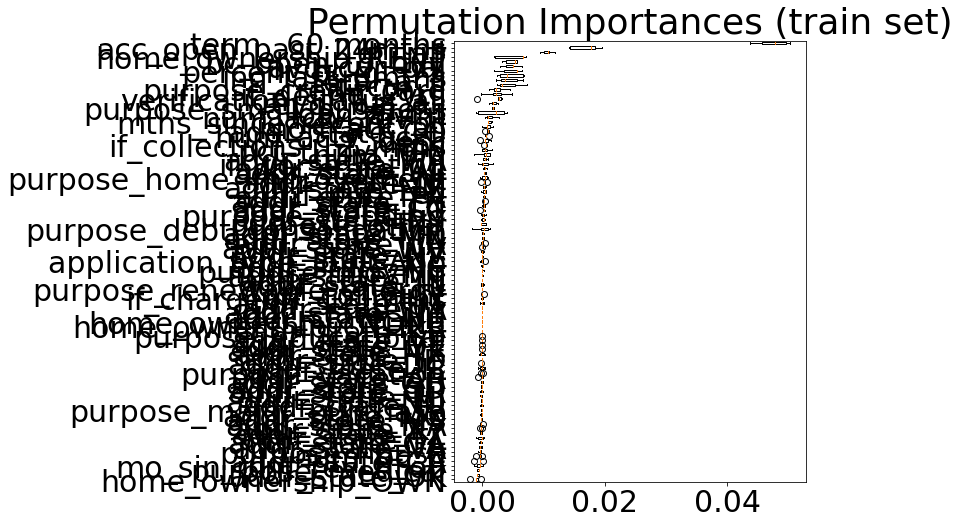

Index(['home_ownership_OWN', 'addr_state_OK', 'purpose_medical',
       'mo_sin_rcnt_rev_tl_op', 'addr_state_CA', 'num_bc_tl', 'purpose_house',
       'addr_state_VA', 'addr_state_GA', 'addr_state_FL', 'addr_state_AZ',
       'addr_state_KY', 'addr_state_MA', 'addr_state_MS', 'addr_state_MO',
       'purpose_major_purchase', 'addr_state_RI', 'addr_state_ND',
       'addr_state_MI', 'addr_state_OR', 'addr_state_SD', 'addr_state_OH',
       'addr_state_AR', 'purpose_vacation', 'addr_state_IL', 'addr_state_DC',
       'addr_state_ID', 'addr_state_TX', 'addr_state_ME', 'addr_state_DE',
       'addr_state_VT', 'purpose_educational', 'addr_state_KS',
       'home_ownership_OTHER', 'home_ownership_NONE', 'addr_state_NH',
       'addr_state_WY', 'addr_state_IA', 'addr_state_UT',
       'if_chargeoff_12_mths', 'tot_coll_amt', 'purpose_renewable_energy',
       'addr_state_HI', 'addr_state_IN', 'addr_state_MT', 'purpose_moving',
       'addr_state_NC', 'application_type_Joint App', 'addr_state_N

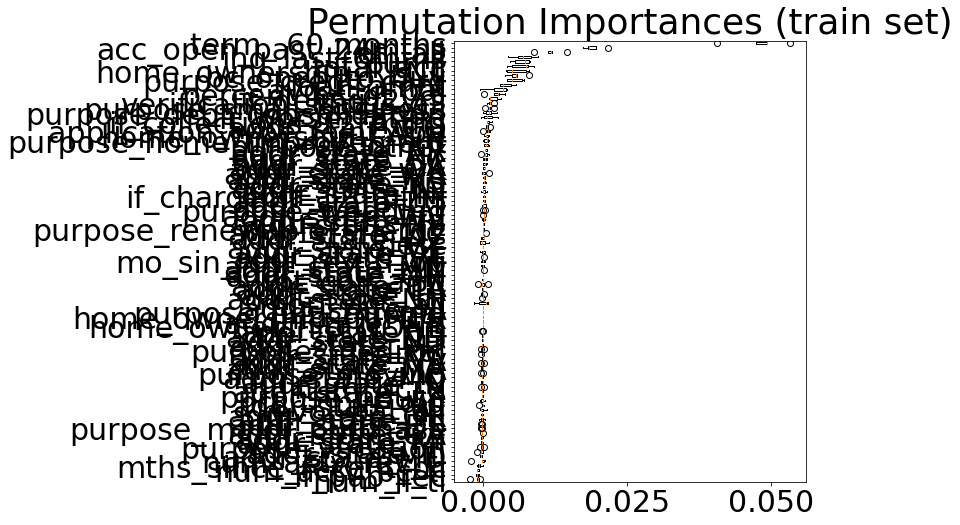

Index(['num_il_tl', 'if_pub_rec', 'num_actv_bc_tl', 'mths_since_recent_bc',
       'num_actv_rev_tl', 'addr_state_MD', 'addr_state_IL', 'purpose_vacation',
       'addr_state_MI', 'addr_state_KY', 'addr_state_GA',
       'purpose_major_purchase', 'addr_state_DE', 'addr_state_FL',
       'addr_state_OR', 'revol_bal_all', 'addr_state_WI', 'pct_tl_nvr_dlq',
       'purpose_house', 'addr_state_TX', 'num_bc_tl', 'addr_state_IN',
       'addr_state_MO', 'purpose_moving', 'addr_state_MA', 'addr_state_NV',
       'addr_state_VA', 'addr_state_NC', 'purpose_medical', 'addr_state_MT',
       'addr_state_SD', 'addr_state_ND', 'addr_state_ID',
       'home_ownership_NONE', 'addr_state_WY', 'home_ownership_OTHER',
       'purpose_educational', 'addr_state_IA', 'mort_acc_all', 'addr_state_NH',
       'addr_state_HI', 'addr_state_PA', 'addr_state_CA', 'tot_coll_amt',
       'addr_state_OH', 'addr_state_NM', 'addr_state_MN',
       'mo_sin_rcnt_rev_tl_op', 'addr_state_VT', 'addr_state_AL',
       'addr

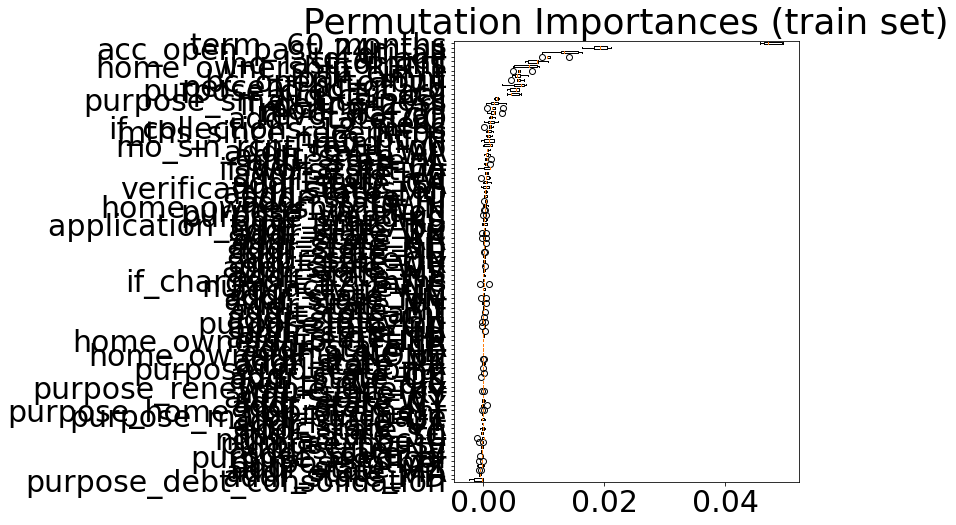

Index(['purpose_debt_consolidation', 'addr_state_MD', 'addr_state_MA',
       'addr_state_AZ', 'purpose_other', 'purpose_medical', 'addr_state_RI',
       'addr_state_NV', 'purpose_house', 'num_actv_bc_tl', 'addr_state_SC',
       'addr_state_FL', 'addr_state_VA', 'addr_state_UT',
       'purpose_major_purchase', 'purpose_home_improvement', 'addr_state_NY',
       'addr_state_CT', 'addr_state_WY', 'addr_state_KY',
       'purpose_renewable_energy', 'pct_tl_nvr_dlq', 'addr_state_OK',
       'addr_state_DE', 'purpose_educational', 'addr_state_PA',
       'addr_state_VT', 'home_ownership_NONE', 'addr_state_ID',
       'addr_state_IA', 'home_ownership_OTHER', 'addr_state_ND',
       'addr_state_MI', 'addr_state_GA', 'purpose_moving', 'addr_state_OH',
       'tot_coll_amt', 'addr_state_MT', 'addr_state_TN', 'addr_state_NM',
       'addr_state_MN', 'addr_state_NC', 'num_actv_rev_tl',
       'if_chargeoff_12_mths', 'addr_state_NE', 'addr_state_MS',
       'addr_state_WV', 'addr_state_OR', 'ad

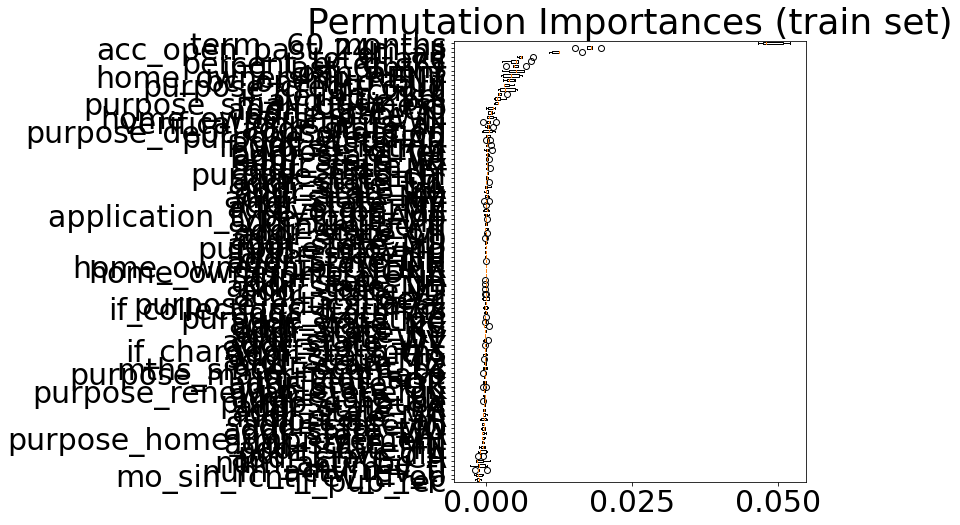

Index(['if_pub_rec', 'mo_sin_rcnt_rev_tl_op', 'num_actv_rev_tl', 'num_il_tl',
       'num_actv_bc_tl', 'addr_state_CA', 'pct_tl_nvr_dlq', 'addr_state_FL',
       'addr_state_MN', 'purpose_home_improvement', 'addr_state_WA',
       'addr_state_MO', 'addr_state_IN', 'mort_acc_all', 'addr_state_MA',
       'addr_state_SC', 'addr_state_PA', 'purpose_house', 'addr_state_TN',
       'purpose_renewable_energy', 'addr_state_OK', 'addr_state_OR',
       'tot_coll_amt', 'purpose_major_purchase', 'mths_since_recent_bc',
       'addr_state_TX', 'addr_state_MD', 'addr_state_GA',
       'if_chargeoff_12_mths', 'addr_state_WY', 'addr_state_WV',
       'addr_state_DE', 'addr_state_KY', 'addr_state_KS', 'addr_state_NC',
       'purpose_vacation', 'addr_state_AZ', 'if_collections_12_mths',
       'purpose_educational', 'desc', 'addr_state_VT', 'addr_state_ID',
       'addr_state_ND', 'addr_state_NE', 'addr_state_IA',
       'home_ownership_NONE', 'home_ownership_OTHER', 'addr_state_OH',
       'addr_sta

In [376]:
%%time
importance_name_1=list()
importance_value_1=list()
selected_features=selected_features_1
for i in range(5):
  print('Set {} Starts'.format(i+1))
  for n in range(5):
    print('Fold {}/5'.format(n+1))
    m=i*5+n
    classifior = LogisticRegression(random_state=0, max_iter=2000000)
    # Fitted Classifiers
    classifior.fit(X_train.iloc[sets[i],selected_features].iloc[fold_train_index[m]],y_train.iloc[sets[i]].iloc[fold_train_index[m]])
    # Calculating Permutation Importance
    result_1=permutation_importance(classifior, X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]],
                           y_train.iloc[sets[i]].iloc[fold_validate_index[m]], scoring=None, n_repeats=5, 
                           n_jobs=None, random_state=123)
    # Sorting the Permutation Importance by Mean
    sorted_idx = result_1.importances_mean.argsort()
    # Plot Permutation Importance
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(result_1.importances[sorted_idx].T,
             vert=False, labels=X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]].columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    fig.tight_layout()
    plt.show()
    importance_name_1.append(X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]].columns[sorted_idx])
    importance_value_1.append(result_1.importances_mean[sorted_idx].T)
    print(X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]].columns[sorted_idx])
    print(result_1.importances_mean[sorted_idx].T)

In [0]:
importance_1=pd.DataFrame(columns=['Name','Value'])

In [0]:
name=list()
value=list()
fold=list()
for i in range(len(importance_name_1)):
  for n in range(len(importance_name_1[i])):
    name.append(importance_name_1[i][n])
    value.append(importance_value_1[i][n])

importance_1.Name=name
importance_1.Value=value

mean=importance_1.groupby(by='Name',as_index=False).mean()
std=importance_1.loc[:,['Name','Value']].groupby(by='Name').std()

In [0]:
importance_rank_1=mean.merge(right=std,left_on='Name',right_on=std.index,suffixes=('_Mean','_Std')).sort_values(by='Value_Mean',ascending=False,ignore_index=True)

In [0]:
pd.options.display.max_rows = 100

In [383]:
importance_rank_1.T

0                     1   ...             93           94
Name        term_ 60 months  acc_open_past_24mths  ...  addr_state_AZ    num_il_tl
Value_Mean        0.0456679             0.0138371  ...    -7.6145e-05 -0.000139444
Value_Std         0.0037682            0.00389721  ...    0.000292726  0.000817923

[3 rows x 95 columns]

In [0]:
# Select features with importance greater than 0.001 (Bottom Line is positive)
importance_rank_1['Important?']=importance_rank_1['Value_Mean']>0.001

In [0]:
important_features_1=importance_rank_1.loc[importance_rank_1['Important?']==True,['Name']].Name

In [392]:
np.array(important_features_1)

array(['term_ 60 months', 'acc_open_past_24mths', 'dti_all', 'total_acc',
       'bc_open_to_buy', 'inq_last_6mths', 'home_ownership_RENT',
       'loan_amnt', 'if_cur_il', 'percent_bc_gt_75', 'avg_cur_bal',
       'verification_status_all', 'if_delinq_2yrs', 'purpose_credit_card',
       'purpose_small_business', 'mort_acc_all', 'home_ownership_OWN'],
      dtype=object)

In [386]:
len(important_features_1)

17

In [393]:
%%time
# Calculating performance with important features
classifior = LogisticRegression(random_state=0,max_iter=2000000)

# Calculating the probability with important features

y_prob_imp_1=list()
for i in range(5):
  print('set{} starts'.format(i+1))
  y_prob_imp_1.append(cross_val_predict(classifior, 
                                X_train.iloc[sets[i],:].loc[:,important_features_1],y_train[sets[i]], cv=5,method='predict_proba'))
  print('set{} ends'.format(i+1))

set1 starts
set1 ends
set2 starts
set2 ends
set3 starts
set3 ends
set4 starts
set4 ends
set5 starts
set5 ends
CPU times: user 1min 58s, sys: 1min 4s, total: 3min 3s
Wall time: 1min 33s


In [399]:
threshold=0.50
scores=pd.DataFrame(columns=['accuracy','f1_score','precision','recall'],index=range(25))
y_pred_imp1=list()

for i in range(5):
  # print('Set{}'.format(i+1))
  for n in range(5):
    m=i*5+n
    y_pred_imp1.append((y_prob_imp_1[i][fold_validate_index[m]][:,1]>threshold).astype(int))
    scores.iloc[m,:].loc['accuracy'] = metrics.accuracy_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp1[m])
    scores.iloc[m,:].loc['f1_score'] = metrics.f1_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp1[m])
    scores.iloc[m,:].loc['precision'] = metrics.precision_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp1[m])
    scores.iloc[m,:].loc['recall'] = metrics.recall_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp1[m])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.accuracy.mean(), scores.accuracy.std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores.f1_score.mean(), scores.f1_score.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores.precision.mean(), scores.precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores.recall.mean(), scores.recall.std() * 2))

Accuracy: 0.64 (+/- 0.01)
f1 Score: 0.65 (+/- 0.01)
Precision: 0.64 (+/- 0.01)
Recall: 0.65 (+/- 0.01)


### 2.4.2 Feature Importance for Level 2 Features
- **Result:** Based on feature importance, variables reduced from 13 to 9 variables, with about 5% accuracy droped (60%)
- **Important Variables:**

  'loan_amnt', 'acc_open_past_24mths','bc_open_to_buy','avg_cur_bal', 'home_ownership_RENT', 'percent_bc_gt_75','inq_last_6mths', 'desc', 'num_il_tl'

Set 1 Starts
Fold 1/5


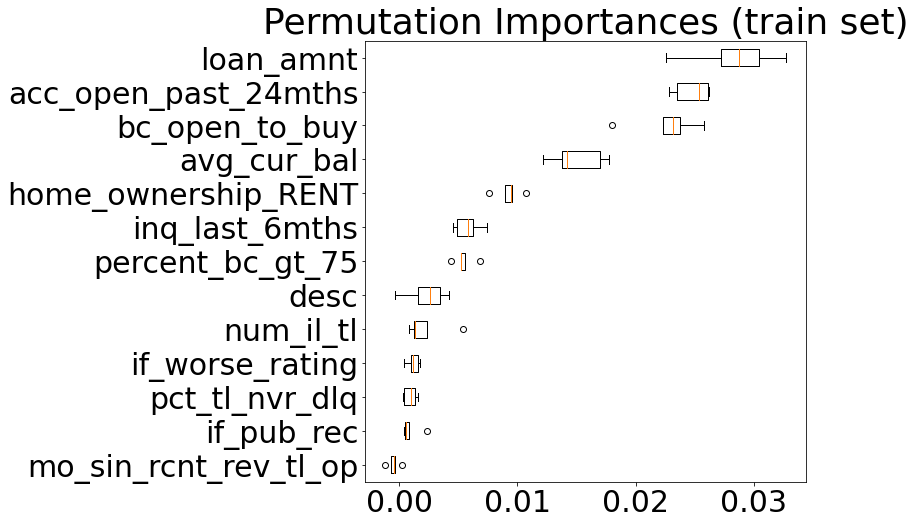

Index(['mo_sin_rcnt_rev_tl_op', 'if_pub_rec', 'pct_tl_nvr_dlq',
       'if_worse_rating', 'num_il_tl', 'desc', 'percent_bc_gt_75',
       'inq_last_6mths', 'home_ownership_RENT', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.0005116   0.00090422  0.00091612  0.00118977  0.00221297  0.00228435
  0.00542534  0.00577037  0.0092445   0.01494349  0.02262939  0.02481856
  0.02836407]
Fold 2/5


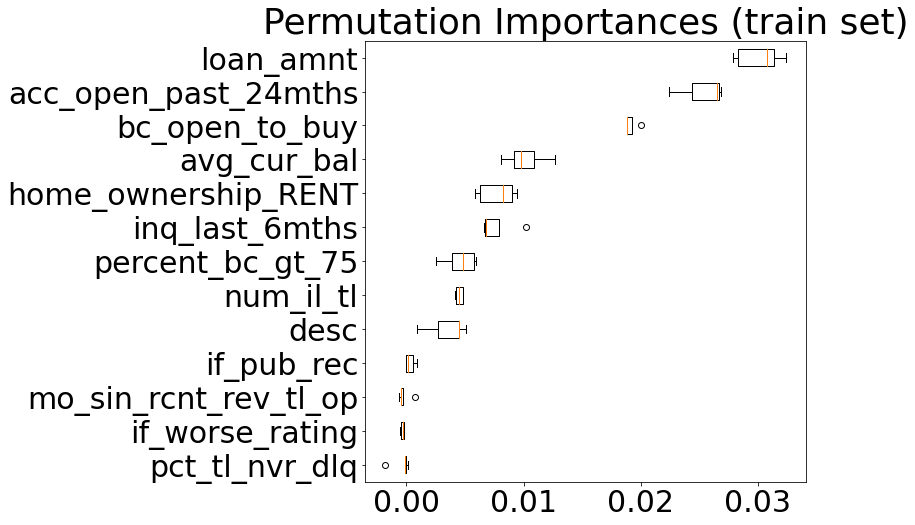

Index(['pct_tl_nvr_dlq', 'if_worse_rating', 'mo_sin_rcnt_rev_tl_op',
       'if_pub_rec', 'desc', 'num_il_tl', 'percent_bc_gt_75', 'inq_last_6mths',
       'home_ownership_RENT', 'avg_cur_bal', 'bc_open_to_buy',
       'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.00038073 -0.00035693 -0.00021416  0.00033314  0.00354551  0.00452112
  0.0045925   0.00766211  0.00776919  0.01012493  0.01915526  0.02536585
  0.03012493]
Fold 3/5


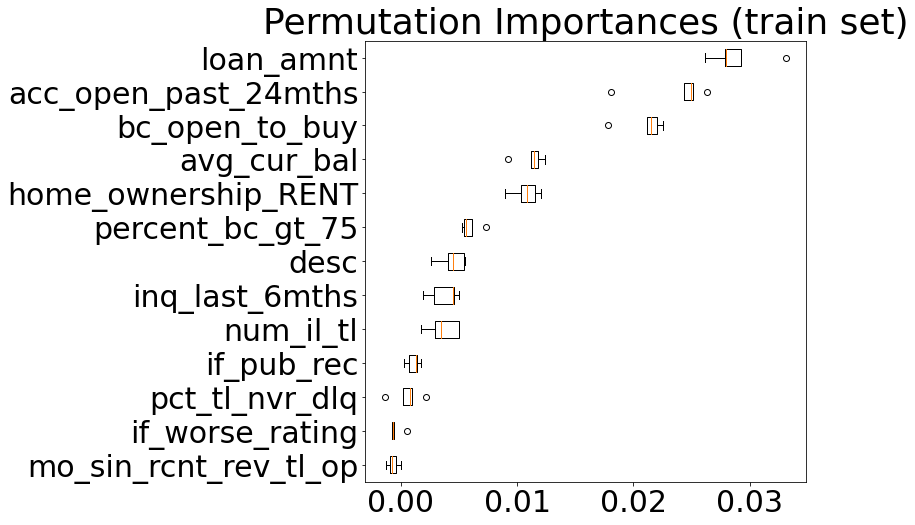

Index(['mo_sin_rcnt_rev_tl_op', 'if_worse_rating', 'pct_tl_nvr_dlq',
       'if_pub_rec', 'num_il_tl', 'inq_last_6mths', 'desc', 'percent_bc_gt_75',
       'home_ownership_RENT', 'avg_cur_bal', 'bc_open_to_buy',
       'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.00063058 -0.00041642  0.00057109  0.00109459  0.00362879  0.00379536
  0.00443783  0.00596074  0.0107674   0.01124331  0.02099941  0.02375967
  0.02886377]
Fold 4/5


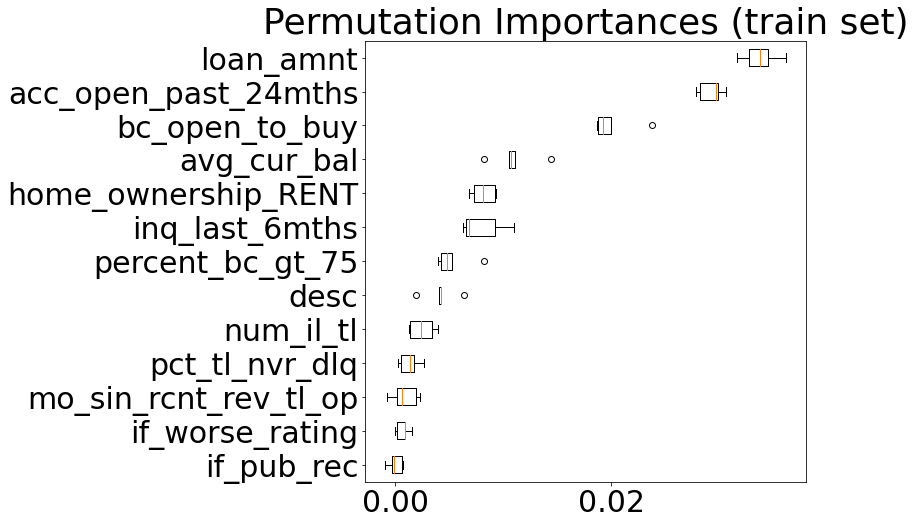

Index(['if_pub_rec', 'if_worse_rating', 'mo_sin_rcnt_rev_tl_op',
       'pct_tl_nvr_dlq', 'num_il_tl', 'desc', 'percent_bc_gt_75',
       'inq_last_6mths', 'home_ownership_RENT', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[2.37953599e-05 7.25758477e-04 8.68530637e-04 1.33254015e-03
 2.48661511e-03 4.16418798e-03 5.29446758e-03 7.99524093e-03
 8.16180845e-03 1.10053540e-02 2.00594884e-02 2.92207020e-02
 3.37299227e-02]
Fold 5/5


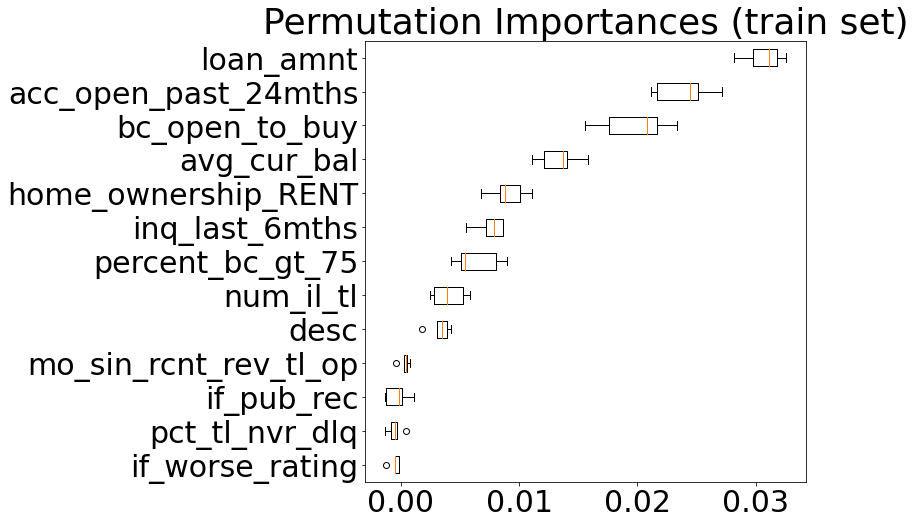

Index(['if_worse_rating', 'pct_tl_nvr_dlq', 'if_pub_rec',
       'mo_sin_rcnt_rev_tl_op', 'desc', 'num_il_tl', 'percent_bc_gt_75',
       'inq_last_6mths', 'home_ownership_RENT', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.0005235  -0.0005116  -0.00029744  0.00033314  0.00330756  0.00405711
  0.00635336  0.00756692  0.00903034  0.01337299  0.01980964  0.02391434
  0.03070791]
Set 2 Starts
Fold 1/5


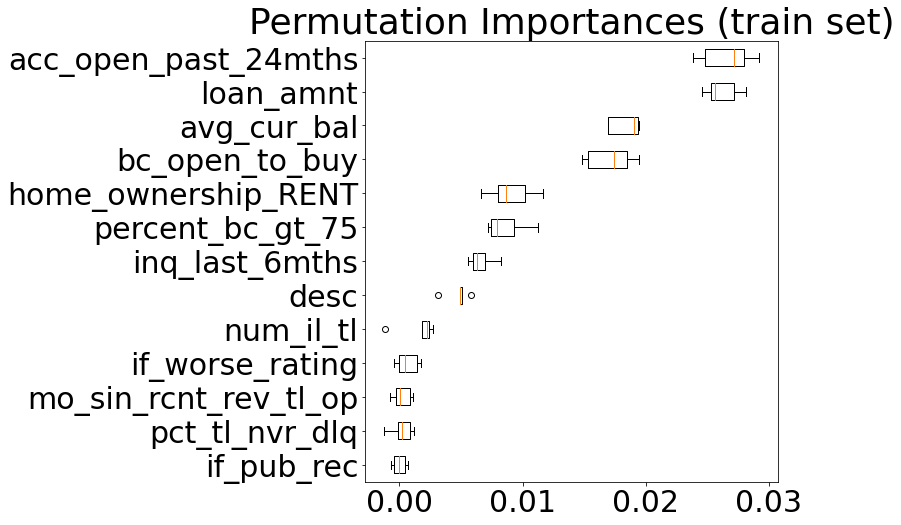

Index(['if_pub_rec', 'pct_tl_nvr_dlq', 'mo_sin_rcnt_rev_tl_op',
       'if_worse_rating', 'num_il_tl', 'desc', 'inq_last_6mths',
       'percent_bc_gt_75', 'home_ownership_RENT', 'bc_open_to_buy',
       'avg_cur_bal', 'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[-3.56930399e-05  1.66567519e-04  1.90362879e-04  6.18679358e-04
  1.59428911e-03  4.75907198e-03  6.59131469e-03  8.62581797e-03
  9.01844140e-03  1.70850684e-02  1.83462225e-02  2.61511005e-02
  2.65913147e-02]
Fold 2/5


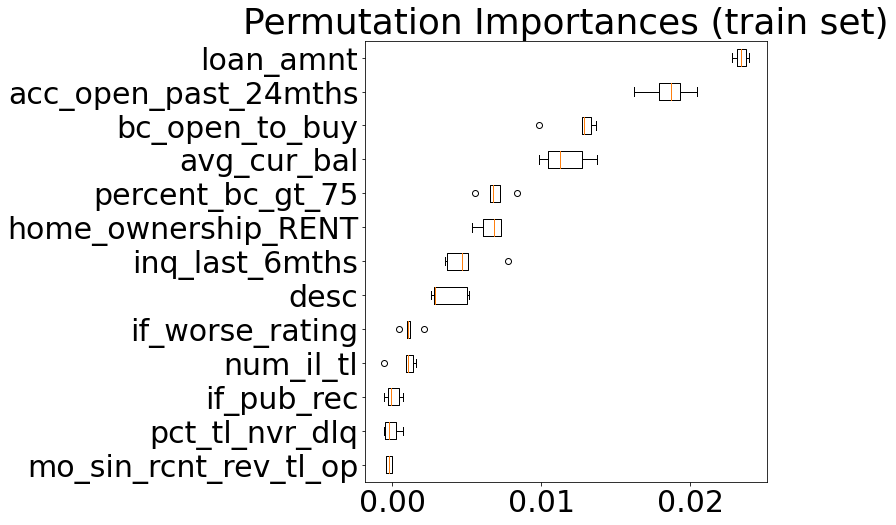

Index(['mo_sin_rcnt_rev_tl_op', 'pct_tl_nvr_dlq', 'if_pub_rec', 'num_il_tl',
       'if_worse_rating', 'desc', 'inq_last_6mths', 'home_ownership_RENT',
       'percent_bc_gt_75', 'avg_cur_bal', 'bc_open_to_buy',
       'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-2.26055919e-04 -5.94883998e-05  2.37953599e-05  8.80428316e-04
  1.16597264e-03  3.66448543e-03  4.94943486e-03  6.57941701e-03
  6.88875669e-03  1.16002380e-02  1.24806663e-02  1.85365854e-02
  2.33908388e-02]
Fold 3/5


Index(['if_worse_rating', 'pct_tl_nvr_dlq', 'if_pub_rec',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'desc', 'inq_last_6mths',
       'percent_bc_gt_75', 'home_ownership_RENT', 'bc_open_to_buy',
       'avg_cur_bal', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.00166568 -0.00014277  0.00063058  0.00071386  0.00270077  0.0061392
  0.00804283  0.00814991  0.0082094   0.01305175  0.0138489   0.02646044
  0.02847115]
Fold 4/5


Index(['pct_tl_nvr_dlq', 'if_pub_rec', 'mo_sin_rcnt_rev_tl_op',
       'if_worse_rating', 'desc', 'num_il_tl', 'inq_last_6mths',
       'home_ownership_RENT', 'percent_bc_gt_75', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[0.00035693 0.00054729 0.00090422 0.00202261 0.0030934  0.00488995
 0.00653183 0.00791196 0.01093397 0.01520523 0.01801309 0.02039262
 0.0245925 ]
Fold 5/5


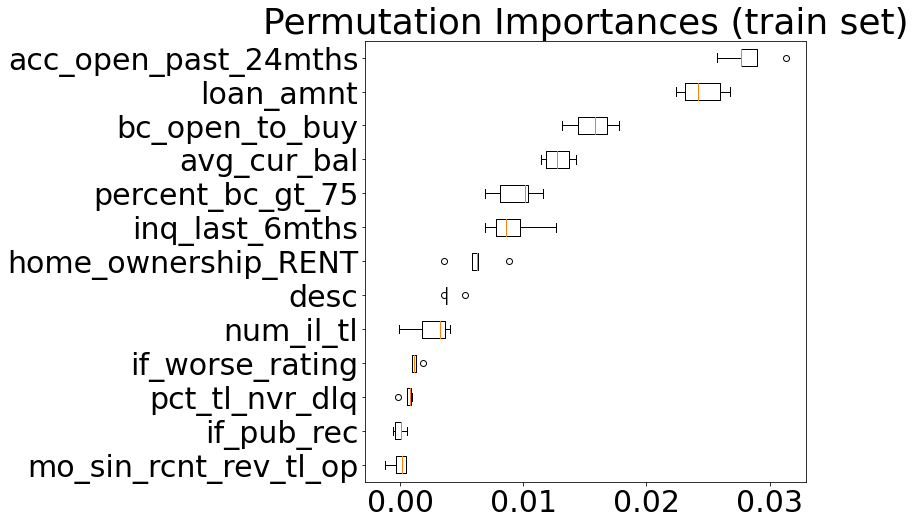

Index(['mo_sin_rcnt_rev_tl_op', 'if_pub_rec', 'pct_tl_nvr_dlq',
       'if_worse_rating', 'num_il_tl', 'desc', 'home_ownership_RENT',
       'inq_last_6mths', 'percent_bc_gt_75', 'avg_cur_bal', 'bc_open_to_buy',
       'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[-8.32837597e-05 -5.94883998e-05  5.94883998e-04  1.24925640e-03
  2.52230815e-03  4.04521118e-03  6.16299822e-03  9.13741820e-03
  9.42296252e-03  1.27900059e-02  1.56097561e-02  2.45092207e-02
  2.82688876e-02]
Set 3 Starts
Fold 1/5


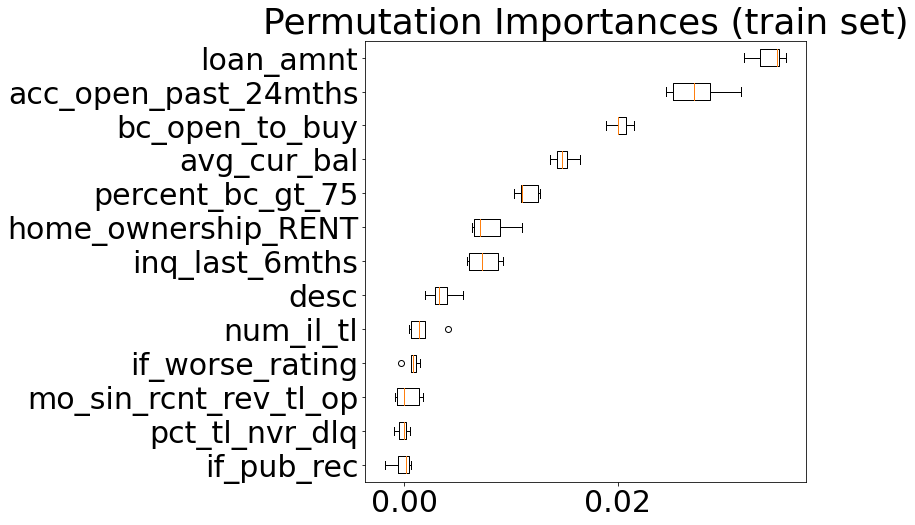

Index(['if_pub_rec', 'pct_tl_nvr_dlq', 'mo_sin_rcnt_rev_tl_op',
       'if_worse_rating', 'num_il_tl', 'desc', 'inq_last_6mths',
       'home_ownership_RENT', 'percent_bc_gt_75', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.00021416 -0.00014277  0.00032124  0.00072576  0.00170137  0.00352171
  0.00743605  0.00799524  0.01151695  0.0148959   0.02026175  0.02742415
  0.03419393]
Fold 2/5


Index(['pct_tl_nvr_dlq', 'if_pub_rec', 'if_worse_rating',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'desc', 'inq_last_6mths',
       'home_ownership_RENT', 'percent_bc_gt_75', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-1.45151695e-03 -6.06781678e-04 -5.11600238e-04 -1.18976800e-05
  2.07019631e-03  3.87864366e-03  6.91255205e-03  7.78108269e-03
  8.49494349e-03  1.49553837e-02  1.49553837e-02  2.75193337e-02
  2.94586556e-02]
Fold 3/5


Index(['if_pub_rec', 'num_il_tl', 'pct_tl_nvr_dlq', 'if_worse_rating',
       'mo_sin_rcnt_rev_tl_op', 'desc', 'home_ownership_RENT',
       'percent_bc_gt_75', 'inq_last_6mths', 'avg_cur_bal', 'bc_open_to_buy',
       'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[0.00010708 0.00040452 0.00045211 0.00046401 0.00078525 0.00082094
 0.00284355 0.0045925  0.00521118 0.0123141  0.01417014 0.01875074
 0.02692445]
Fold 4/5


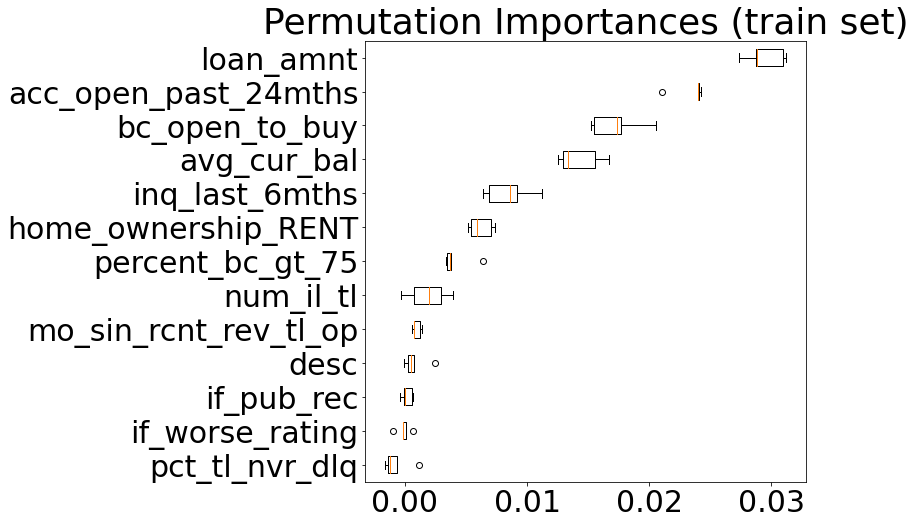

Index(['pct_tl_nvr_dlq', 'if_worse_rating', 'if_pub_rec', 'desc',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'percent_bc_gt_75',
       'home_ownership_RENT', 'inq_last_6mths', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.00074955 -0.00011898  0.00013087  0.00076145  0.00092802  0.00184414
  0.0041166   0.00618679  0.00844735  0.01420583  0.01726353  0.02347412
  0.02942296]
Fold 5/5


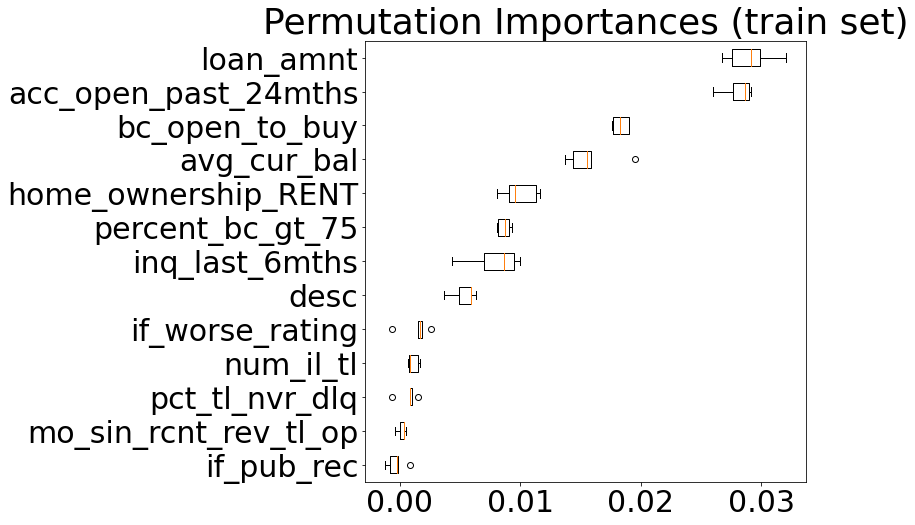

Index(['if_pub_rec', 'mo_sin_rcnt_rev_tl_op', 'pct_tl_nvr_dlq', 'num_il_tl',
       'if_worse_rating', 'desc', 'inq_last_6mths', 'percent_bc_gt_75',
       'home_ownership_RENT', 'avg_cur_bal', 'bc_open_to_buy',
       'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.00028556  0.00017848  0.000702    0.00110655  0.00138021  0.00534238
  0.00787673  0.00867392  0.00993515  0.01580106  0.01829972  0.02809209
  0.02906776]
Set 4 Starts
Fold 1/5


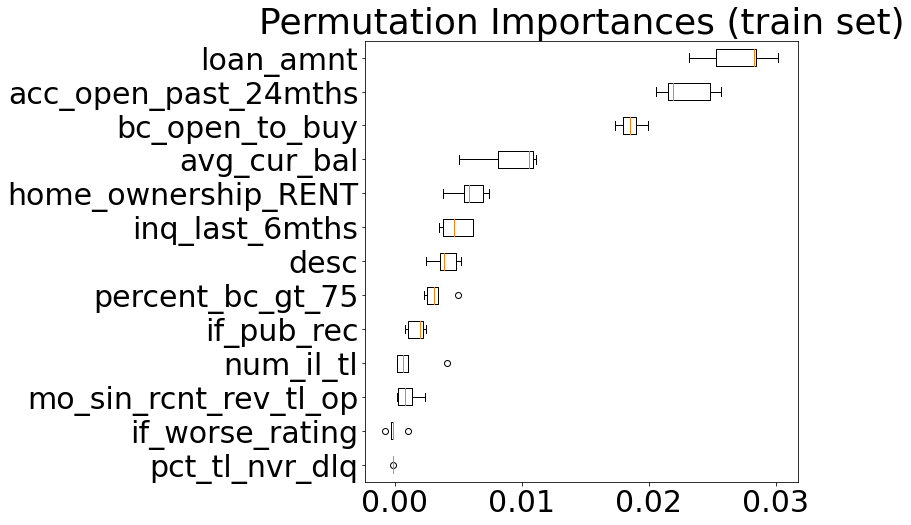

Index(['pct_tl_nvr_dlq', 'if_worse_rating', 'mo_sin_rcnt_rev_tl_op',
       'num_il_tl', 'if_pub_rec', 'percent_bc_gt_75', 'desc', 'inq_last_6mths',
       'home_ownership_RENT', 'avg_cur_bal', 'bc_open_to_buy',
       'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-1.30874479e-04 -5.94883998e-05  9.99405116e-04  1.23735872e-03
  1.67757287e-03  3.25996431e-03  3.97382510e-03  4.85425342e-03
  5.90124926e-03  9.16121356e-03  1.85603807e-02  2.29268293e-02
  2.70791196e-02]
Fold 2/5


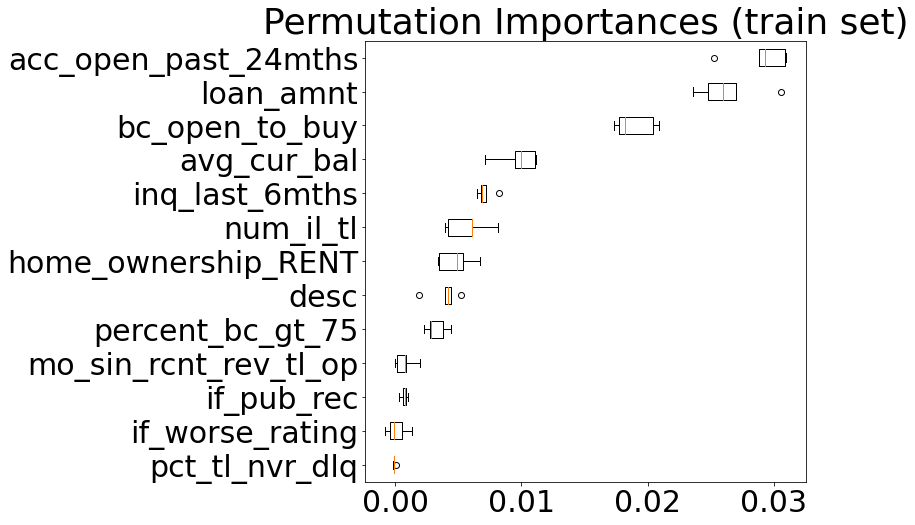

Index(['pct_tl_nvr_dlq', 'if_worse_rating', 'if_pub_rec',
       'mo_sin_rcnt_rev_tl_op', 'percent_bc_gt_75', 'desc',
       'home_ownership_RENT', 'num_il_tl', 'inq_last_6mths', 'avg_cur_bal',
       'bc_open_to_buy', 'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[-8.32837597e-05  1.18976800e-04  7.01963117e-04  7.61451517e-04
  3.22427127e-03  3.96192742e-03  4.78286734e-03  5.68709102e-03
  7.11481261e-03  9.75609756e-03  1.89173111e-02  2.63890541e-02
  2.90541344e-02]
Fold 3/5


Index(['if_pub_rec', 'pct_tl_nvr_dlq', 'if_worse_rating',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'desc', 'inq_last_6mths',
       'percent_bc_gt_75', 'home_ownership_RENT', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[5.94883998e-05 7.13860797e-05 4.64009518e-04 2.23676383e-03
 2.47471743e-03 3.87864366e-03 6.19869126e-03 6.69839381e-03
 7.59071981e-03 1.30279595e-02 2.09518144e-02 2.60678168e-02
 3.06960143e-02]
Fold 4/5


Index(['pct_tl_nvr_dlq', 'if_pub_rec', 'mo_sin_rcnt_rev_tl_op',
       'if_worse_rating', 'desc', 'num_il_tl', 'home_ownership_RENT',
       'inq_last_6mths', 'percent_bc_gt_75', 'avg_cur_bal', 'bc_open_to_buy',
       'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[5.94883998e-05 1.58239143e-03 1.76085663e-03 2.24866151e-03
 3.52171327e-03 4.78286734e-03 8.53063653e-03 9.32778108e-03
 1.08863772e-02 1.58834027e-02 2.39262344e-02 2.89351576e-02
 3.49553837e-02]
Fold 5/5


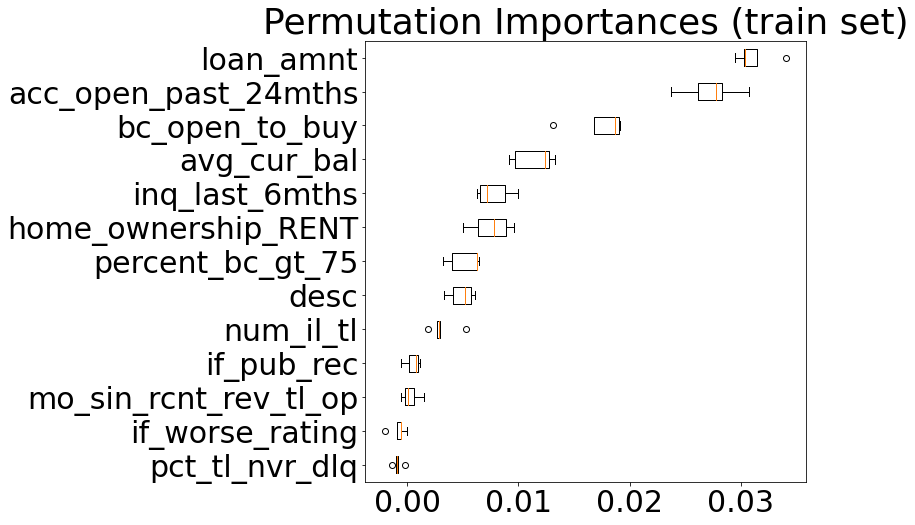

Index(['pct_tl_nvr_dlq', 'if_worse_rating', 'mo_sin_rcnt_rev_tl_op',
       'if_pub_rec', 'num_il_tl', 'desc', 'percent_bc_gt_75',
       'home_ownership_RENT', 'inq_last_6mths', 'avg_cur_bal',
       'bc_open_to_buy', 'acc_open_past_24mths', 'loan_amnt'],
      dtype='object')
[-0.00086858 -0.00079719  0.00029746  0.00049973  0.00312928  0.00489024
  0.00523529  0.00755548  0.00773395  0.01147005  0.01734785  0.0273306
  0.03113808]
Set 5 Starts
Fold 1/5


Index(['pct_tl_nvr_dlq', 'if_worse_rating', 'if_pub_rec',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'inq_last_6mths', 'desc',
       'percent_bc_gt_75', 'home_ownership_RENT', 'avg_cur_bal',
       'bc_open_to_buy', 'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[-1.95121951e-03 -5.71088638e-04 -3.80725758e-04  4.44089210e-17
  8.68530637e-04  4.60440214e-03  5.34205830e-03  6.18679358e-03
  6.66270077e-03  1.21475312e-02  1.34443783e-02  2.79238548e-02
  3.21713266e-02]
Fold 2/5


Index(['if_pub_rec', 'pct_tl_nvr_dlq', 'mo_sin_rcnt_rev_tl_op',
       'if_worse_rating', 'inq_last_6mths', 'num_il_tl', 'percent_bc_gt_75',
       'desc', 'home_ownership_RENT', 'bc_open_to_buy', 'avg_cur_bal',
       'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[-3.68828079e-04 -2.26055919e-04 -2.22044605e-17  2.14158239e-04
  3.30755503e-03  3.97382510e-03  6.03212374e-03  6.41284949e-03
  9.77989292e-03  1.46936347e-02  1.58715051e-02  2.99940512e-02
  3.25877454e-02]
Fold 3/5


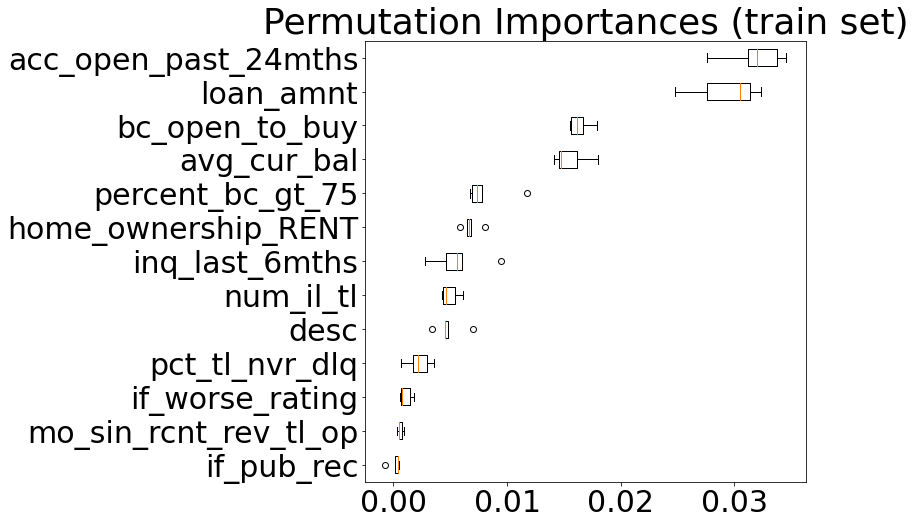

Index(['if_pub_rec', 'mo_sin_rcnt_rev_tl_op', 'if_worse_rating',
       'pct_tl_nvr_dlq', 'desc', 'num_il_tl', 'inq_last_6mths',
       'home_ownership_RENT', 'percent_bc_gt_75', 'avg_cur_bal',
       'bc_open_to_buy', 'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[0.00011898 0.00059488 0.001047   0.00220107 0.00485425 0.00496133
 0.00571089 0.00676978 0.00811422 0.01552647 0.016395   0.02930399
 0.0318144 ]
Fold 4/5


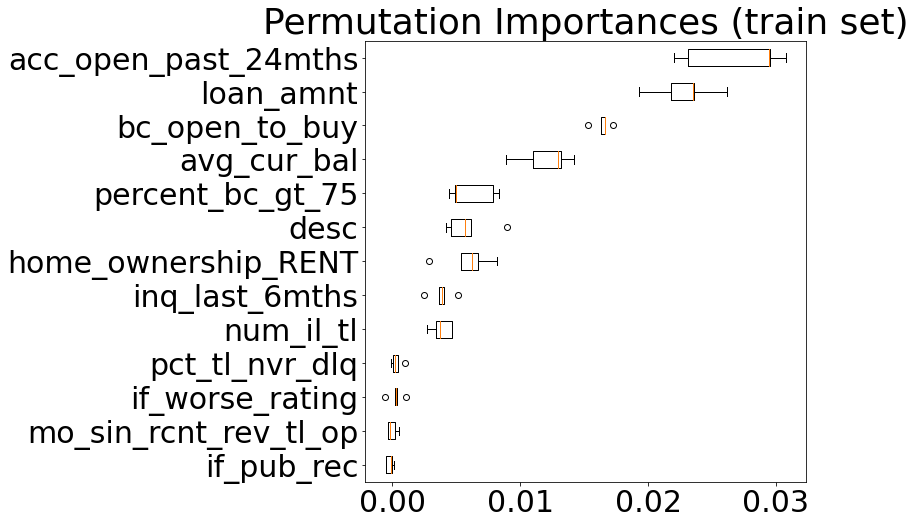

Index(['if_pub_rec', 'mo_sin_rcnt_rev_tl_op', 'if_worse_rating',
       'pct_tl_nvr_dlq', 'num_il_tl', 'inq_last_6mths', 'home_ownership_RENT',
       'desc', 'percent_bc_gt_75', 'avg_cur_bal', 'bc_open_to_buy',
       'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[-1.90362879e-04 -1.18976800e-05  2.85544319e-04  3.33135039e-04
  3.84295062e-03  3.85484830e-03  5.88935158e-03  5.92504462e-03
  6.11540750e-03  1.20523498e-02  1.64306960e-02  2.28673409e-02
  2.69839381e-02]
Fold 5/5


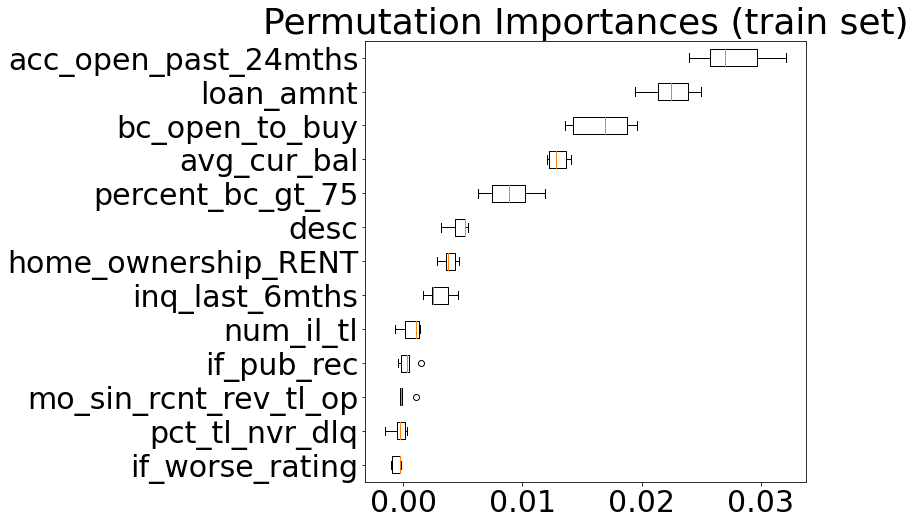

Index(['if_worse_rating', 'pct_tl_nvr_dlq', 'mo_sin_rcnt_rev_tl_op',
       'if_pub_rec', 'num_il_tl', 'inq_last_6mths', 'home_ownership_RENT',
       'desc', 'percent_bc_gt_75', 'avg_cur_bal', 'bc_open_to_buy',
       'loan_amnt', 'acc_open_past_24mths'],
      dtype='object')
[-5.47325837e-04 -3.45053245e-04  5.94919388e-05  3.45053245e-04
  6.66309715e-04  2.99839372e-03  3.84317925e-03  4.67606639e-03
  8.93568921e-03  1.29930394e-02  1.66220477e-02  2.24403593e-02
  2.76875483e-02]


In [401]:
importance_name_2=list()
importance_value_2=list()
selected_features=selected_features_2
for i in range(5):
  print('Set {} Starts'.format(i+1))
  for n in range(5):
    print('Fold {}/5'.format(n+1))
    m=i*5+n
    classifior = LogisticRegression(random_state=0, max_iter=2000000)
    # Fitted Classifiers
    classifior.fit(X_train.iloc[sets[i],selected_features].iloc[fold_train_index[m]],y_train.iloc[sets[i]].iloc[fold_train_index[m]])
    # Calculating Permutation Importance
    result_2=permutation_importance(classifior, X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]],
                           y_train.iloc[sets[i]].iloc[fold_validate_index[m]], scoring=None, n_repeats=5, 
                           n_jobs=None, random_state=123)
    # Sorting the Permutation Importance by Mean
    sorted_idx = result_2.importances_mean.argsort()
    # Plot Permutation Importance
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(result_2.importances[sorted_idx].T,
             vert=False, labels=X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]].columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    fig.tight_layout()
    plt.show()
    importance_name_2.append(X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]].columns[sorted_idx])
    importance_value_2.append(result_2.importances_mean[sorted_idx].T)
    print(X_train.iloc[sets[i],selected_features].iloc[fold_validate_index[m]].columns[sorted_idx])
    print(result_2.importances_mean[sorted_idx].T)

In [0]:
importance_2=pd.DataFrame(columns=['Name','Value'])

In [0]:
name=list()
value=list()
fold=list()
for i in range(len(importance_name_2)):
  for n in range(len(importance_name_2[i])):
    name.append(importance_name_2[i][n])
    value.append(importance_value_2[i][n])

importance_2.Name=name
importance_2.Value=value

mean=importance_2.groupby(by='Name',as_index=False).mean()
std=importance_2.loc[:,['Name','Value']].groupby(by='Name').std()

In [0]:
importance_rank_2=mean.merge(right=std,left_on='Name',right_on=std.index,suffixes=('_Mean','_Std')).sort_values(by='Value_Mean',ascending=False,ignore_index=True)

In [405]:
importance_rank_2

Name  Value_Mean  Value_Std
0               loan_amnt    0.028430   0.003331
1    acc_open_past_24mths    0.026326   0.003695
2          bc_open_to_buy    0.017645   0.002968
3             avg_cur_bal    0.013302   0.002259
4     home_ownership_RENT    0.007396   0.001882
5        percent_bc_gt_75    0.006949   0.002340
6          inq_last_6mths    0.006385   0.001811
7                    desc    0.004048   0.001386
8               num_il_tl    0.002730   0.001538
9   mo_sin_rcnt_rev_tl_op    0.000410   0.000663
10        if_worse_rating    0.000334   0.000926
11             if_pub_rec    0.000254   0.000590
12         pct_tl_nvr_dlq    0.000029   0.000841

In [0]:
# Select positive importance features
importance_rank_2['Important?']=importance_rank_2['Value_Mean']>0.001

In [417]:
importance_rank_2

Name  Value_Mean  Value_Std  Important?
0               loan_amnt    0.028430   0.003331        True
1    acc_open_past_24mths    0.026326   0.003695        True
2          bc_open_to_buy    0.017645   0.002968        True
3             avg_cur_bal    0.013302   0.002259        True
4     home_ownership_RENT    0.007396   0.001882        True
5        percent_bc_gt_75    0.006949   0.002340        True
6          inq_last_6mths    0.006385   0.001811        True
7                    desc    0.004048   0.001386        True
8               num_il_tl    0.002730   0.001538        True
9   mo_sin_rcnt_rev_tl_op    0.000410   0.000663       False
10        if_worse_rating    0.000334   0.000926       False
11             if_pub_rec    0.000254   0.000590       False
12         pct_tl_nvr_dlq    0.000029   0.000841       False

In [0]:
important_features_2=importance_rank_2.loc[importance_rank_2['Important?']==True,['Name']].Name

In [419]:
np.array(important_features_2)

array(['loan_amnt', 'acc_open_past_24mths', 'bc_open_to_buy',
       'avg_cur_bal', 'home_ownership_RENT', 'percent_bc_gt_75',
       'inq_last_6mths', 'desc', 'num_il_tl'], dtype=object)

In [422]:
len(important_features_2)

9

In [420]:
%%time
# Calculating performance with important features
classifior = LogisticRegression(random_state=0,max_iter=2000000)

# Calculating the probability with selected features

y_prob_imp_2=list()
for i in range(5):
  print('set{} starts'.format(i+1))
  y_prob_imp_2.append(cross_val_predict(classifior, 
                                X_train.iloc[sets[i],:].loc[:,important_features_2],y_train[sets[i]], cv=5,method='predict_proba'))
  print('set{} ends'.format(i+1))

set1 starts
set1 ends
set2 starts
set2 ends
set3 starts
set3 ends
set4 starts
set4 ends
set5 starts
set5 ends
CPU times: user 24.7 s, sys: 15 s, total: 39.7 s
Wall time: 20.2 s


In [421]:
threshold=0.50
scores=pd.DataFrame(columns=['accuracy','f1_score','precision','recall'],index=range(25))
y_pred_imp2=list()

for i in range(5):
  # print('Set{}'.format(i+1))
  for n in range(5):
    m=i*5+n
    y_pred_imp2.append((y_prob_imp_2[i][fold_validate_index[m]][:,1]>threshold).astype(int))
    scores.iloc[m,:].loc['accuracy'] = metrics.accuracy_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp2[m])
    scores.iloc[m,:].loc['f1_score'] = metrics.f1_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp2[m])
    scores.iloc[m,:].loc['precision'] = metrics.precision_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp2[m])
    scores.iloc[m,:].loc['recall'] = metrics.recall_score(y_train[sets[i]].iloc[fold_validate_index[m]],y_pred_imp2[m])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.accuracy.mean(), scores.accuracy.std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores.f1_score.mean(), scores.f1_score.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores.precision.mean(), scores.precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores.recall.mean(), scores.recall.std() * 2))

Accuracy: 0.60 (+/- 0.01)
f1 Score: 0.60 (+/- 0.01)
Precision: 0.61 (+/- 0.01)
Recall: 0.59 (+/- 0.01)


##2.5 Final Selected Features for Logistic Regression

While multiple rounds of feature selection, with below 17 features, the accuracy can still stay at around 64%; thus, decided to select below 17 features.

In this section, I used final selected features to predit the probability of fully paid. This result will be used in next notebook for reassigning new grades to loans and evaluating the performance with the original grades.

**Final Selected Features:**

'term_ 60 months', 'acc_open_past_24mths', 'dti_all', 'total_acc', 'bc_open_to_buy', 'inq_last_6mths', 'home_ownership_RENT','loan_amnt', 'if_cur_il', 'percent_bc_gt_75', 'avg_cur_bal','verification_status_all', 'if_delinq_2yrs', 'purpose_credit_card','purpose_small_business', 'mort_acc_all', 'home_ownership_OWN'

In [0]:
final_features=['term_ 60 months', 'acc_open_past_24mths', 
                'dti_all', 'total_acc', 'bc_open_to_buy',
                'inq_last_6mths', 'home_ownership_RENT',
                'loan_amnt', 'if_cur_il', 'percent_bc_gt_75',
                'avg_cur_bal','verification_status_all', 
                'if_delinq_2yrs', 'purpose_credit_card',
                'purpose_small_business', 'mort_acc_all', 
                'home_ownership_OWN']

In [424]:
%%time
# Calculating performance with final selected features
classifior = LogisticRegression(random_state=0,max_iter=2000000)

# Calculating the probability with selected features

y_prob_final=list()
for i in range(5):
  print('set{} starts'.format(i+1))
  y_prob_final.append(cross_val_predict(classifior, 
                                X_train.iloc[sets[i],:].loc[:,final_features],y_train[sets[i]], cv=5,method='predict_proba'))
  print('set{} ends'.format(i+1))

set1 starts
set1 ends
set2 starts
set2 ends
set3 starts
set3 ends
set4 starts
set4 ends
set5 starts
set5 ends
CPU times: user 2min 4s, sys: 1min 7s, total: 3min 12s
Wall time: 1min 37s


In [0]:
full_paid_prob=list()
for i in range(5):
  for n in range(5):
    m=5*i+n
    full_paid_prob.append(y_prob_final[i][fold_validate_index[m]][:,1])

In [0]:
pd.DataFrame(full_paid_prob).to_csv('/content/drive/My Drive/Colab Notebooks/Lending Club Project_Joint/fully_paid_prob_validate.csv')